In [1]:
import pandas as pd
import numpy as np
import json

# Carica il dataset
file_path = 'DB_Questionario.csv'  # Sostituisci con il percorso del tuo dataset
data = pd.read_csv(file_path)

# Elimina le colonne che non servono, 'Data invio', 'Lingua iniziale', 'Seme'
data = data.drop(['Data invio', 'Lingua iniziale', 'Seme'], axis=1)

# Funzione per convertire i valori testuali in valori categorici con ordine specifico
def convert_to_ordered_categorical(data):
    categorical_mappings = {}
    absent_values = ["N/A", "NaN", "None", ""]  # Aggiungi altri valori che rappresentano assenza di risposta
    for column in data.columns:
        if data[column].dtype == 'object':
            # Controllo specifico per le colonne con categorie di durata
            if '3+ ore al giorno' in data[column].unique():
                mapping = {
                    "3+ ore al giorno": 3,
                    "Da 1 a 2 ore al giorno": 1,
                    "Da 2 a 3 ore al giorno": 2,
                    "Meno di un'ora al giorno": 0
                }
            elif 'Non lo utilizzo' in data[column].unique():
                mapping = {
                    "Da 1 a 2 ore al giorno": 2,
                    "Da 2 a 3 ore al giorno": 3,
                    "Meno di un'ora al giorno": 1,
                    "Non lo utilizzo": 0,
                    "Più di 3 ore al giorno": 4
                }
            elif '1-2 giorni a settimana' in data[column].unique():
                mapping = {  
                    "1-2 giorni a settimana": 2,
                    "3-4 giorni a settimana": 3,
                    "5-7 giorni a settimana": 4,
                    "Mai": 0,
                    "Occasionalmente": 1
                }  # Inserisci qui la mappatura per la frequenza settimanale
            elif 'Ogni 2 mesi' in data[column].unique():
                mapping = { 
                    "Ogni 2 mesi": 1,
                    "Ogni 2 o più mesi": 0,
                    "Ogni 2 settimane": 3,
                    "Ogni mese": 2 
                }  # Mappatura per la frequenza mensile
            elif 'Allergia' in data[column].unique():
                mapping = { 
                    "Allergia": 0,
                    "Allergia ": 0,
                    "Inquinamento ": 1,
                    "Macchia i tessuti": 2,
                    "Mi viene voglia di berla": 3,
                    "Solo se è  necessario ": 4
                 }  # Mappatura per le ragioni di allergia, inquinamento, ecc.
            elif 'Musica' in data[column].unique():
                mapping = { 
                    "Musica": 1,
                    "Niente": 0,
                    "Podcast": 2,
                    "Radio": 3,
                    "TV": 4
                 }  # Mappatura per le preferenze di ascolto
            elif "Ricariche da diluire" in data[column].unique():
                mapping = { 
                    "Altro": 0,
                    "Entrambe": 3,
                    "Ricariche da diluire": 2,
                    "Ricariche già pronte (bottiglia senza il beccuccio)": 1 
                }  # Mappatura per le tipologie di ricariche, ecc.
            elif 'Sì' in data[column].unique():
                # Assegna manualmente i valori per "Sì" e "No"
                mapping = {'Sì': 1, 'No': 0}
            else:
                # Per altre colonne, ordina i valori univoci
                unique_values = sorted(data[column][~data[column].isin(absent_values)].dropna().unique())
                mapping = {k: v for v, k in enumerate(unique_values)}
            
            # Applica la mappatura solo ai valori non assenti
            data[column] = data[column].map(mapping).where(~data[column].isin(absent_values), data[column])
            categorical_mappings[column] = mapping
    return data, categorical_mappings

# Applica la funzione al dataset
converted_data, mappings = convert_to_ordered_categorical(data)

# Salva il dataset trasformato
converted_data.to_csv('dataset_convertito.csv', index=False)

# Salva le mappature in un file di testo
mappings_file_path = 'istruzioni.txt'
with open(mappings_file_path, 'w') as file:
    for column, mapping in mappings.items():
        file.write(f"Colonna: {column}\n")
        file.write(json.dumps(mapping, indent=4, ensure_ascii=False))
        file.write("\n\n")

In [2]:
list(data.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [3]:
#quanti valori non nulli in 'Età:\xa0'
data['Età:\xa0'].count()

341

    QUI SI ANALIZZA SEZIONE 1 DEL QUESTIONARIO

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_convertito.csv')

/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_10925/4027161015.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


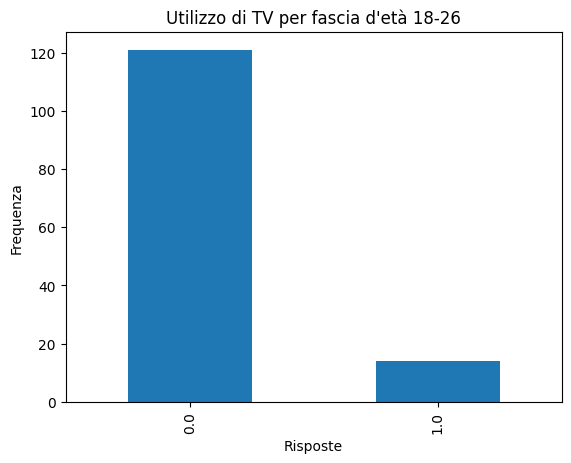

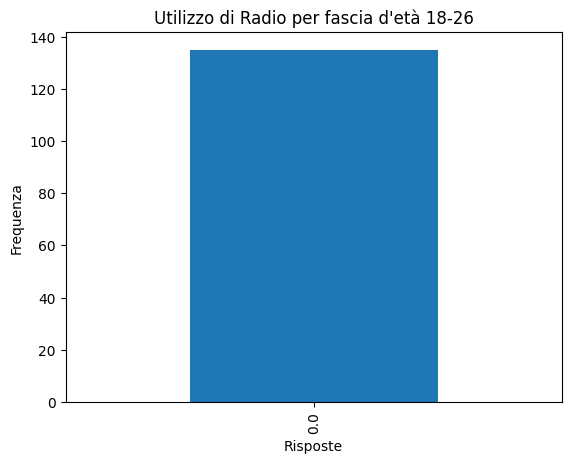

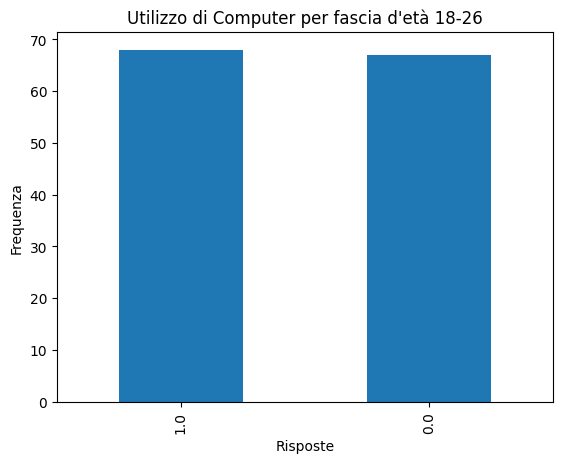

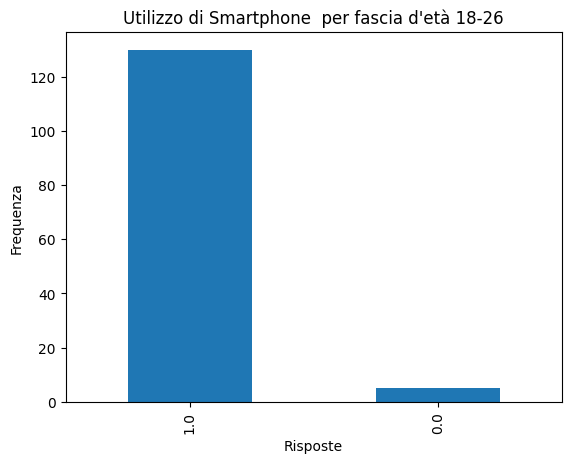

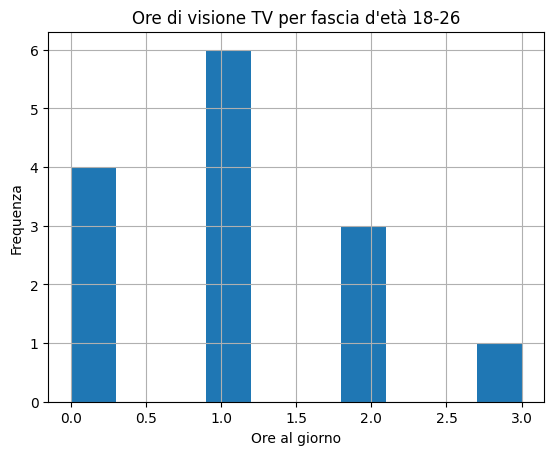

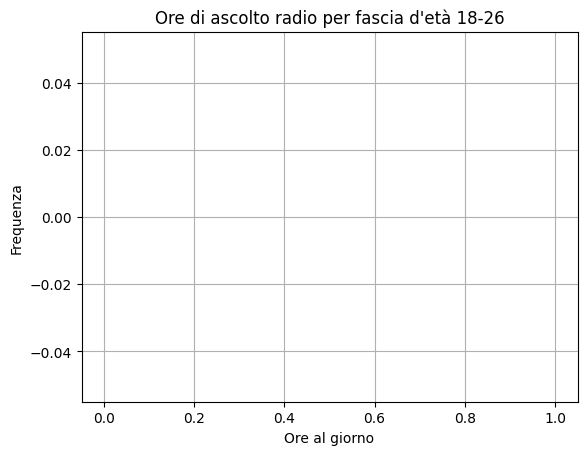

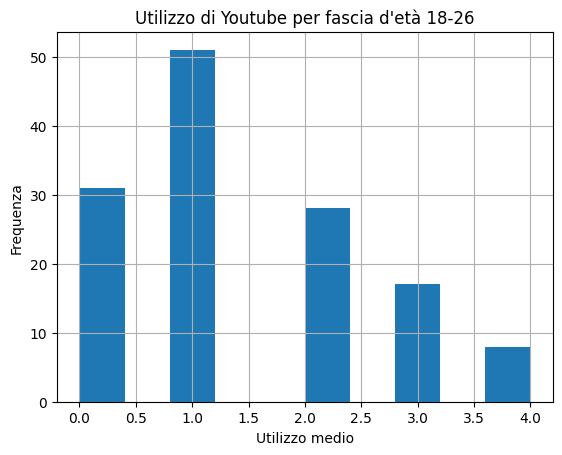

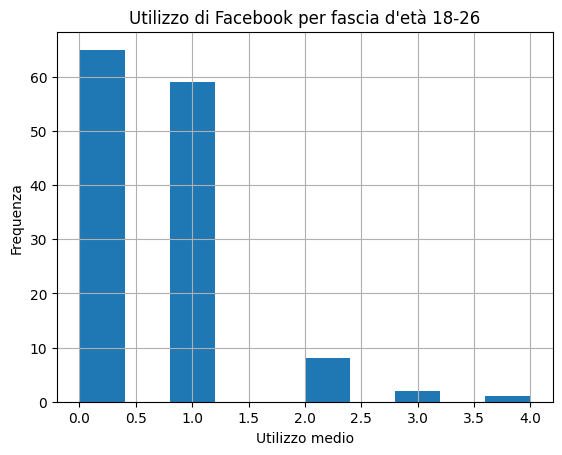

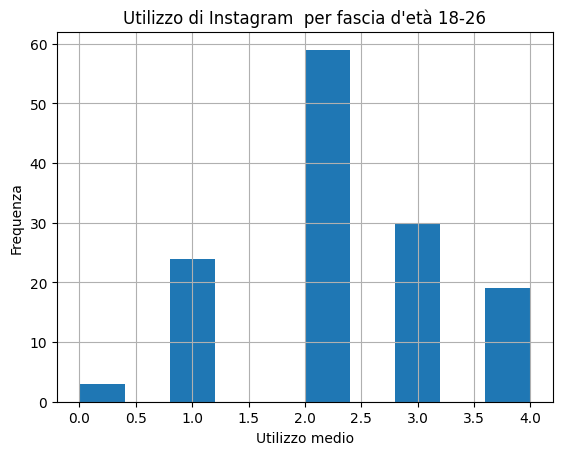

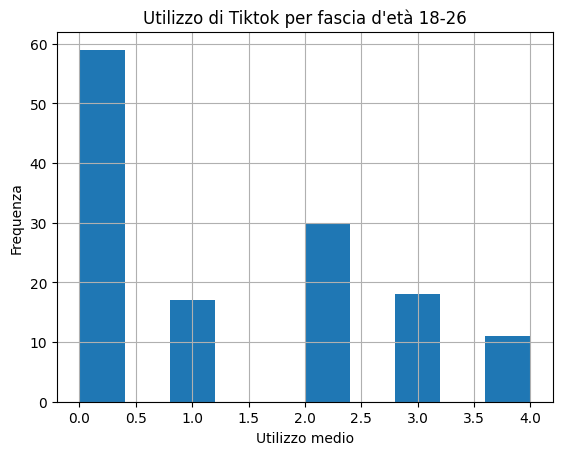

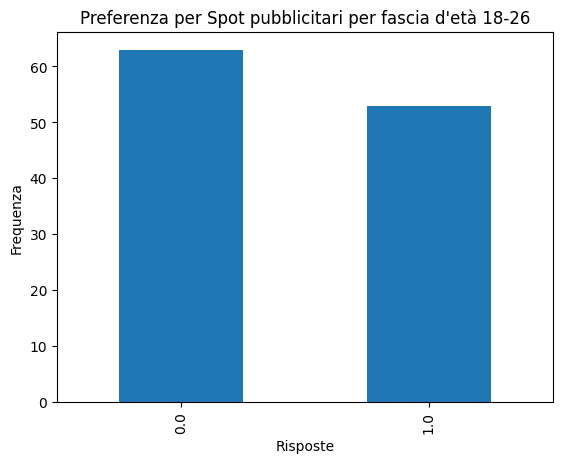

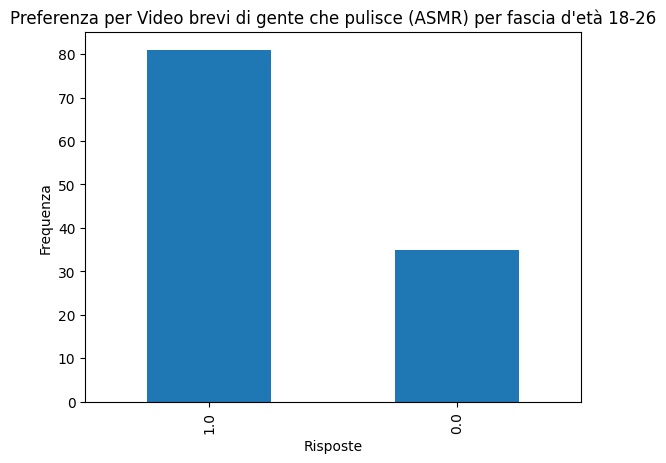

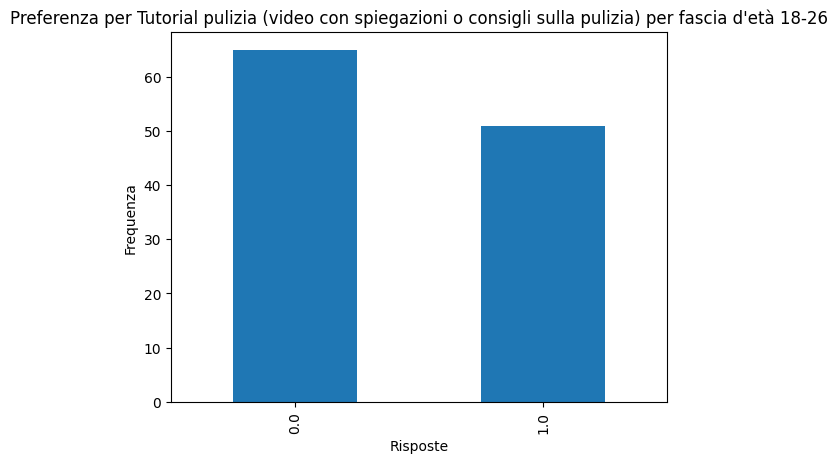

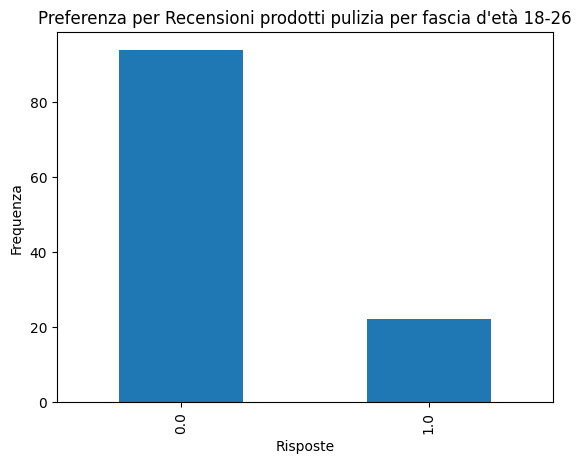

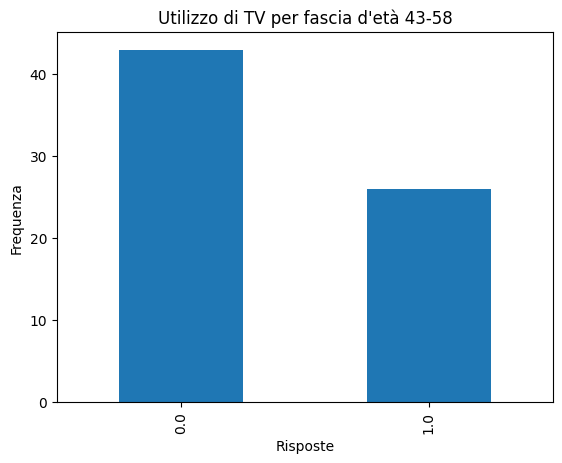

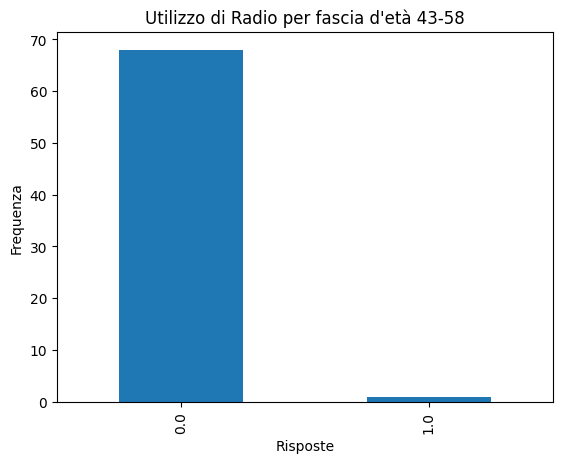

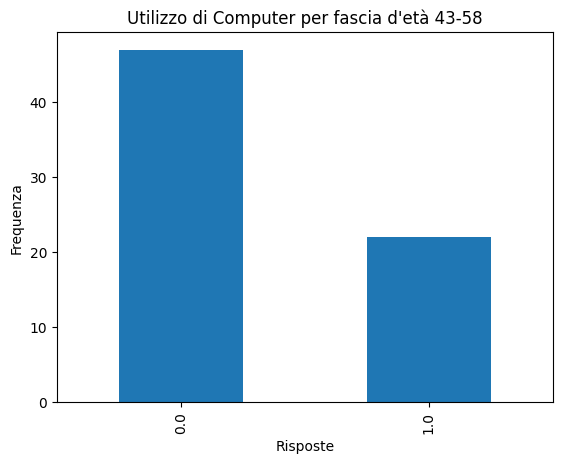

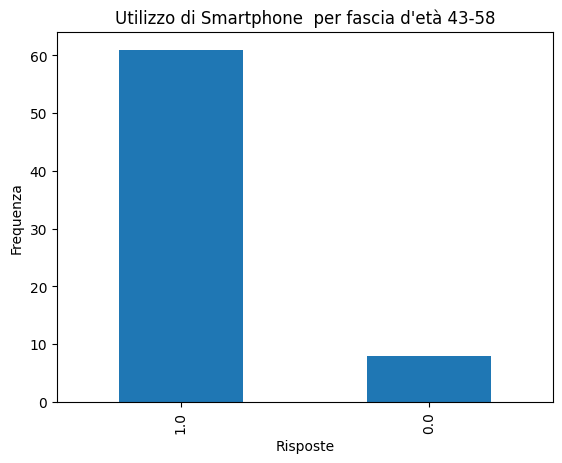

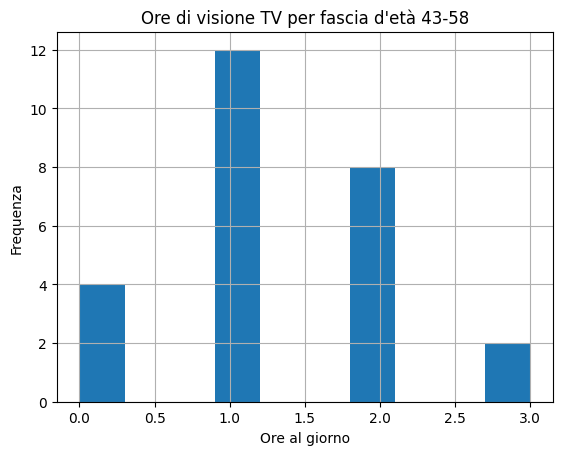

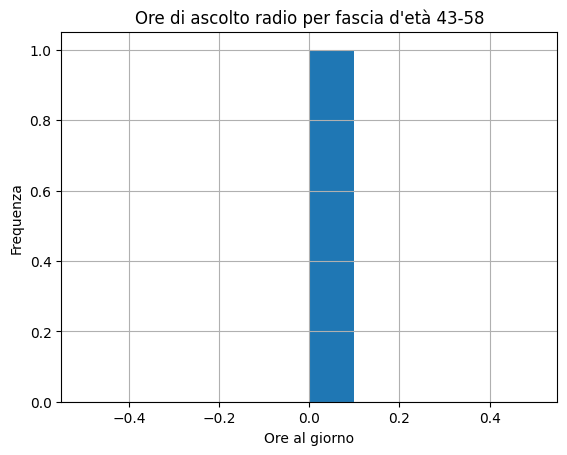

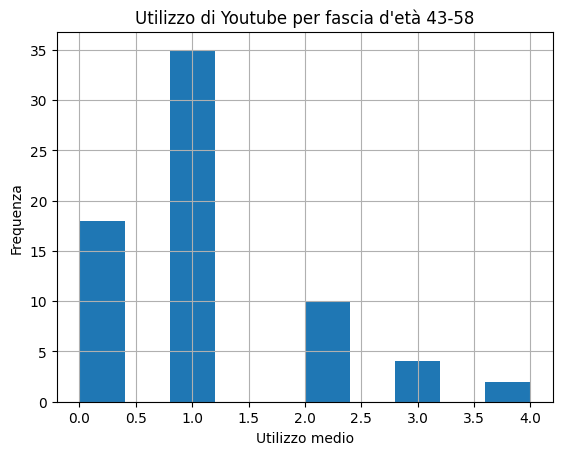

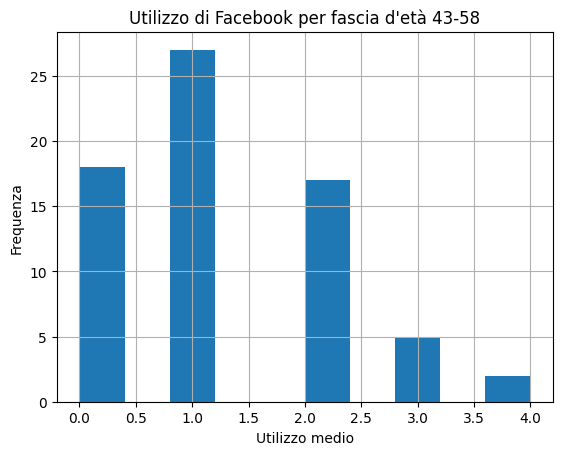

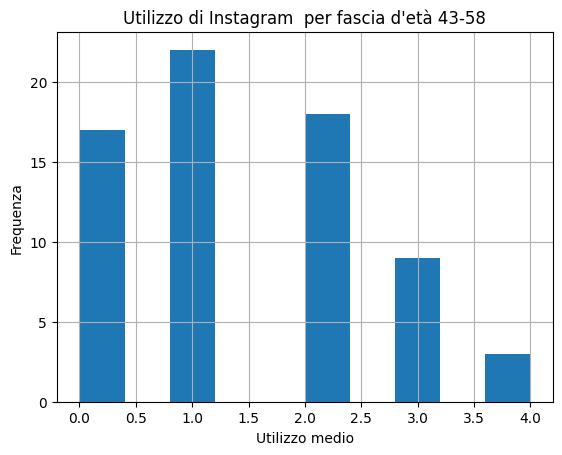

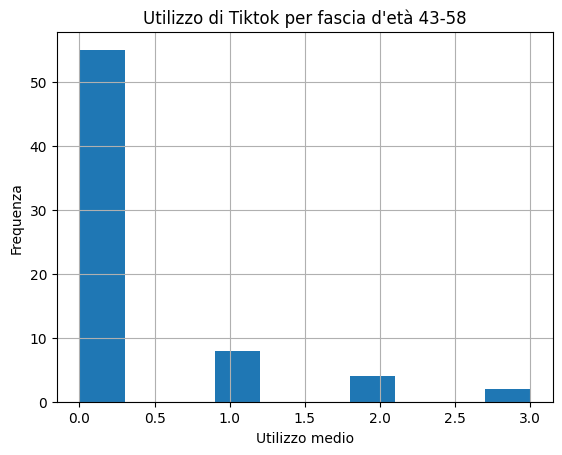

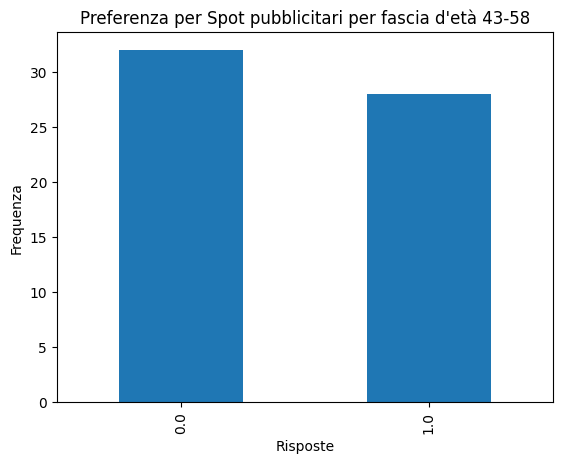

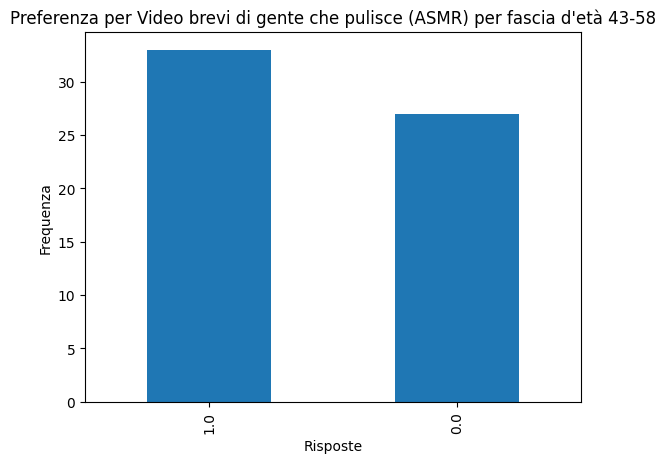

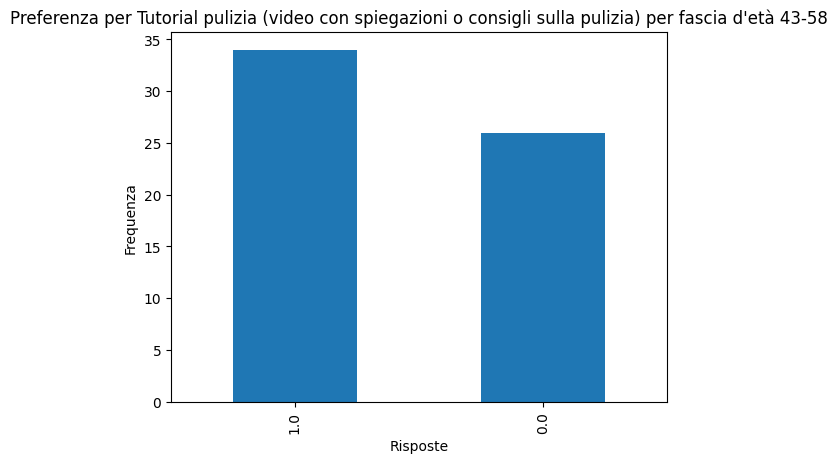

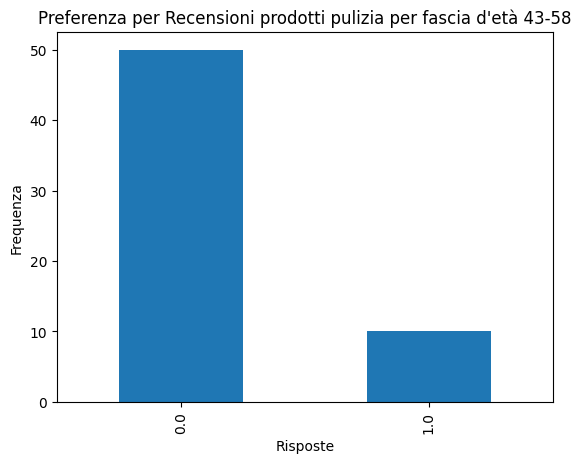

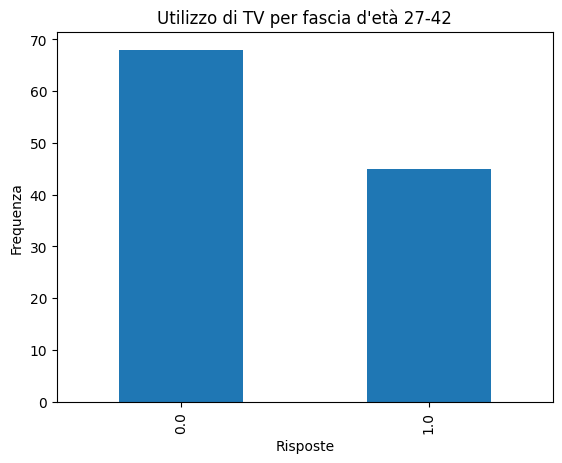

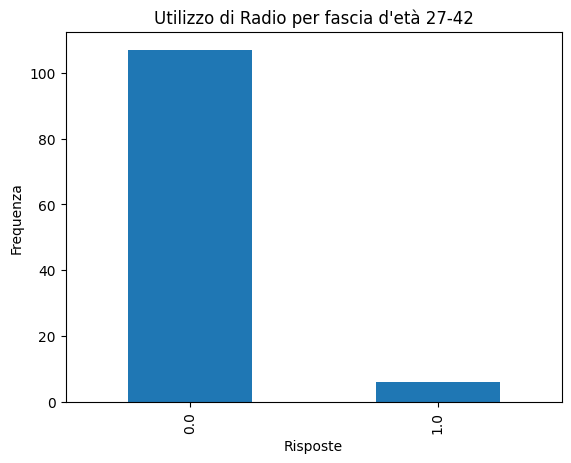

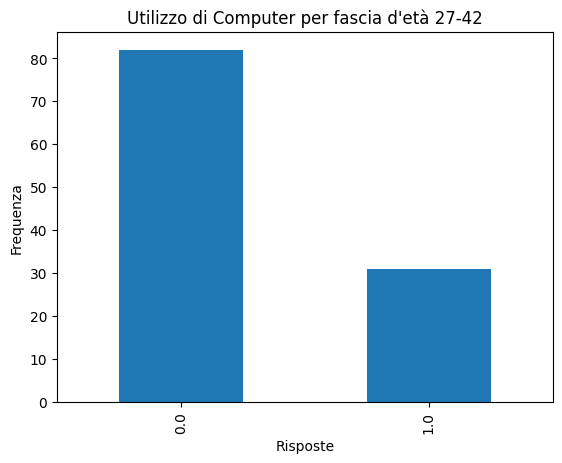

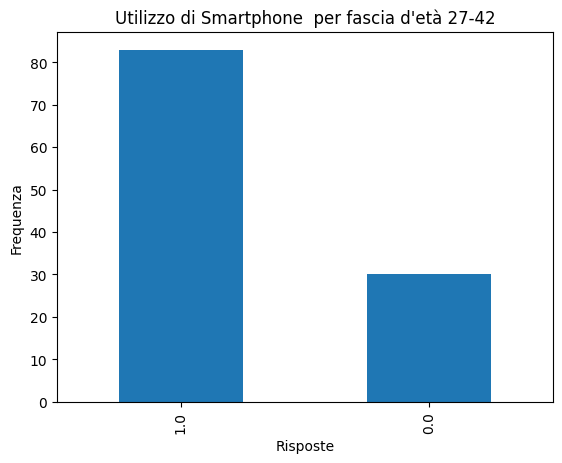

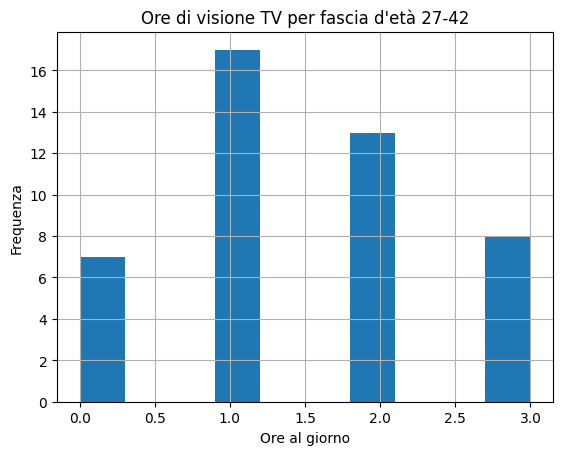

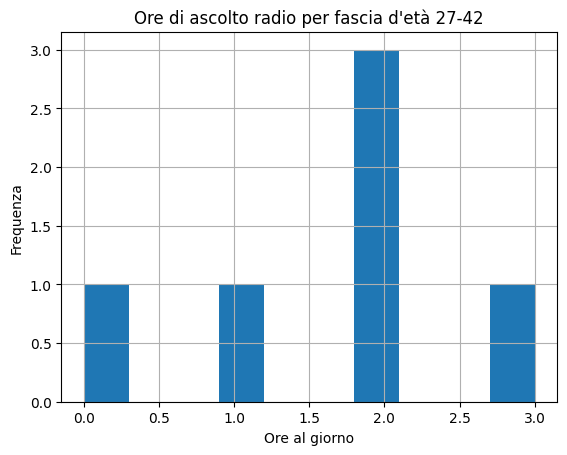

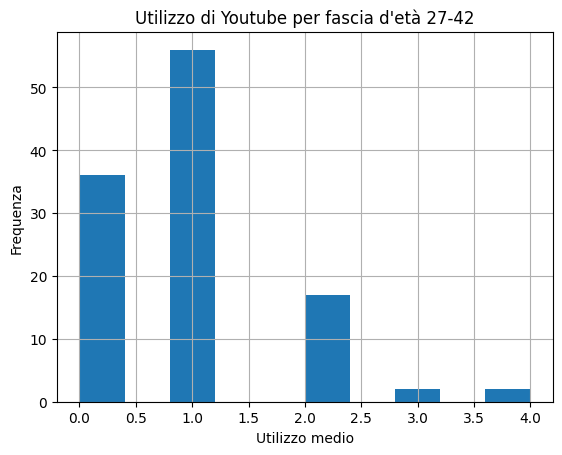

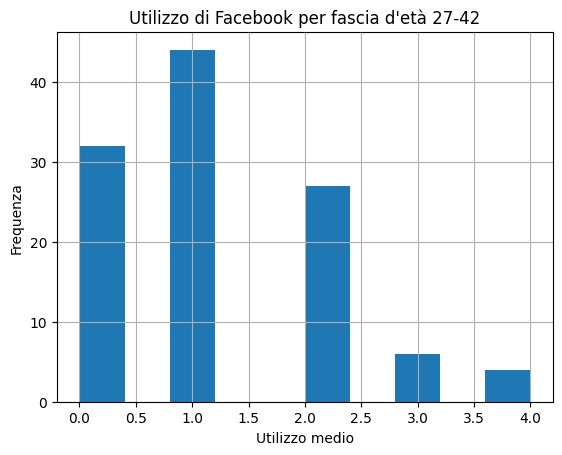

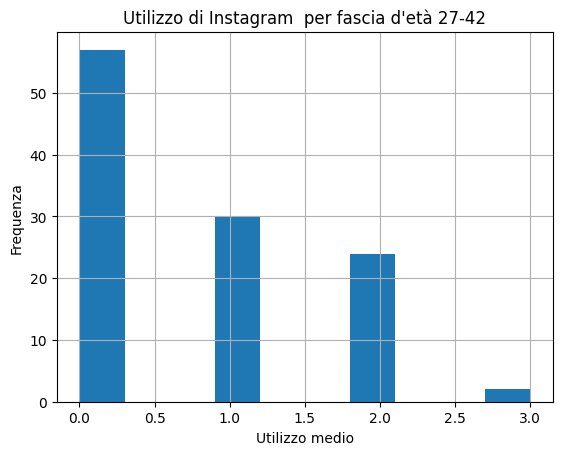

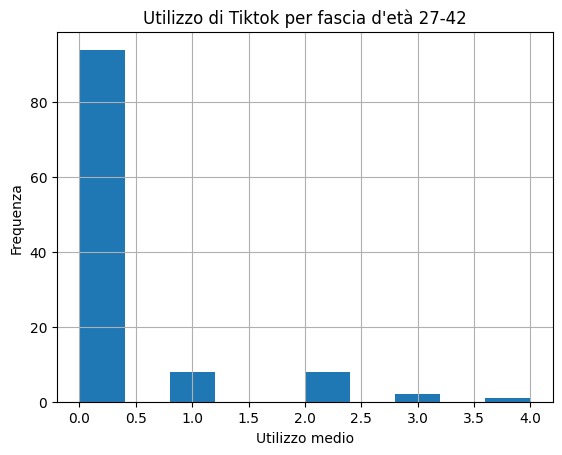

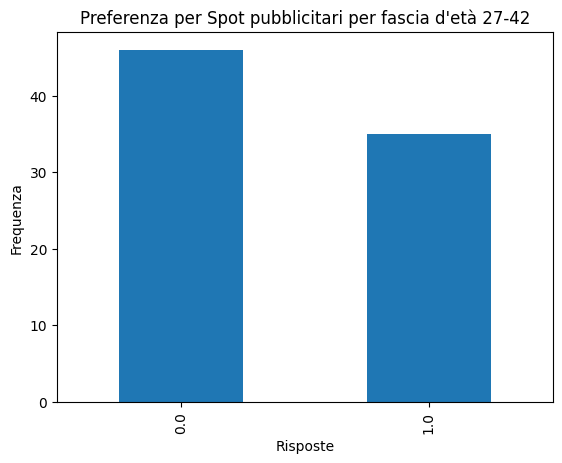

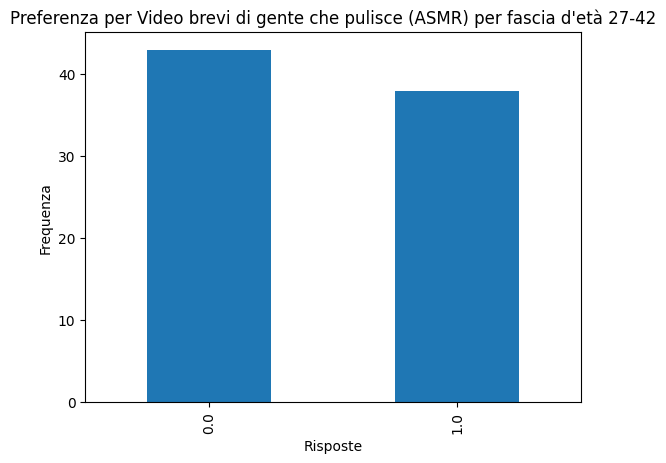

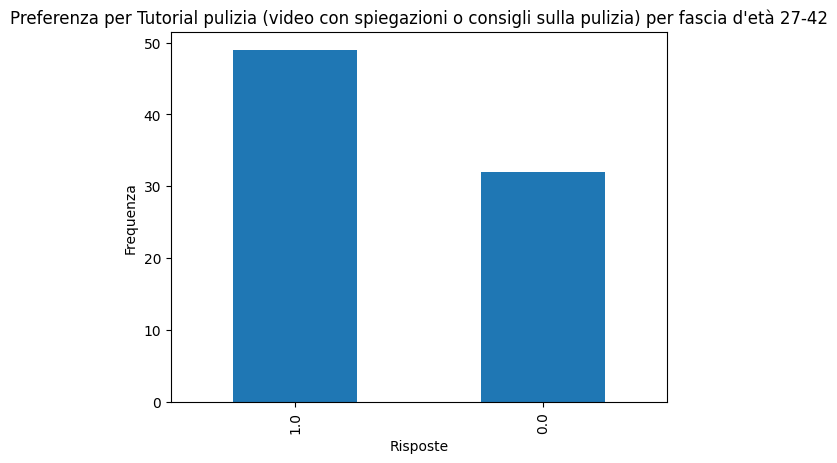

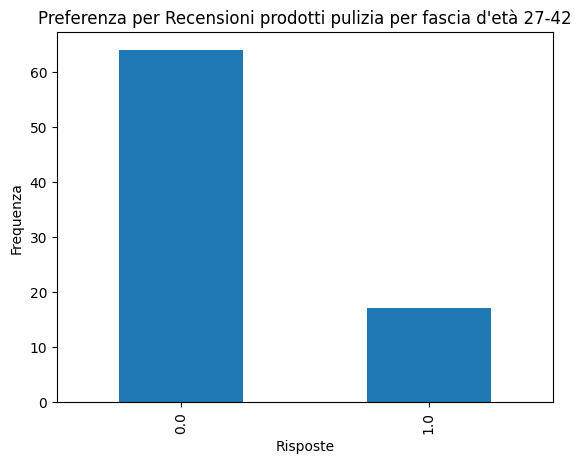

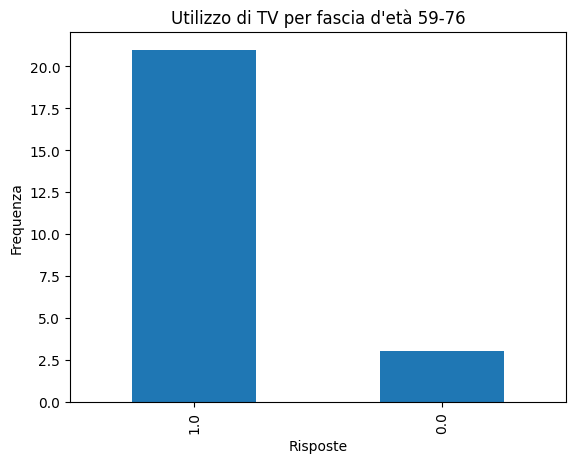

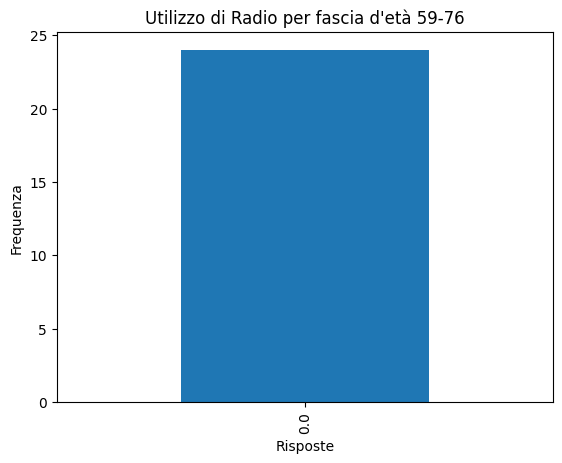

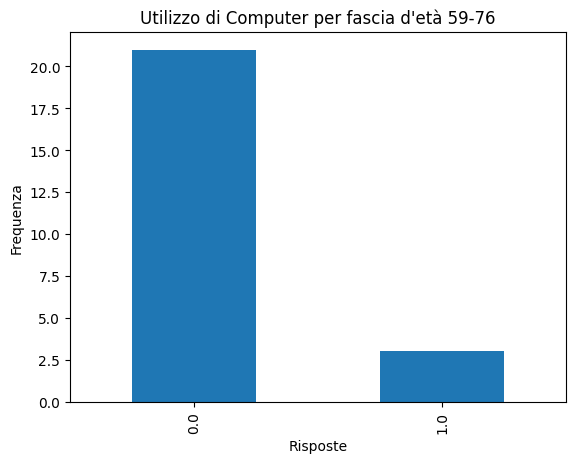

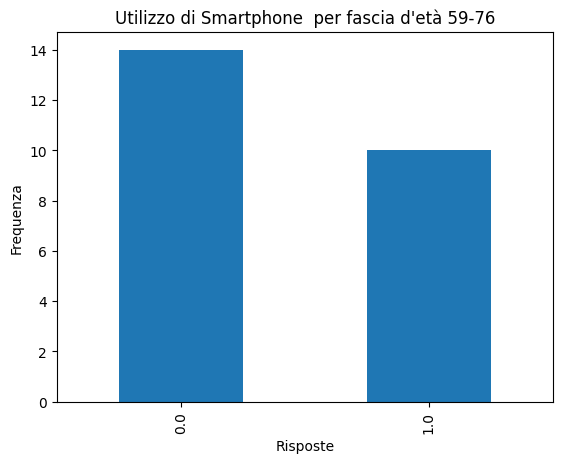

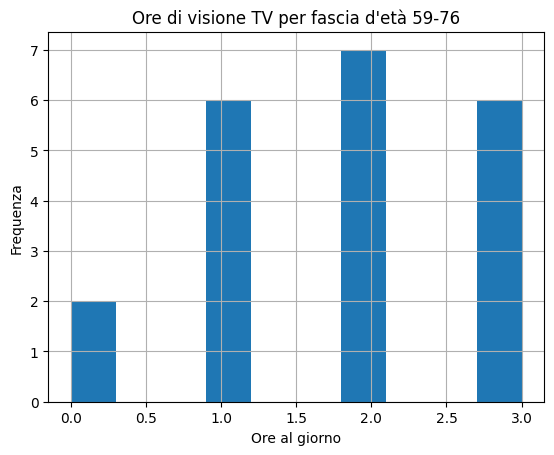

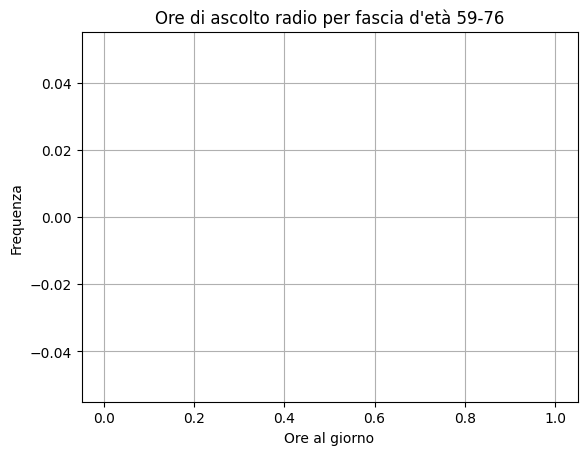

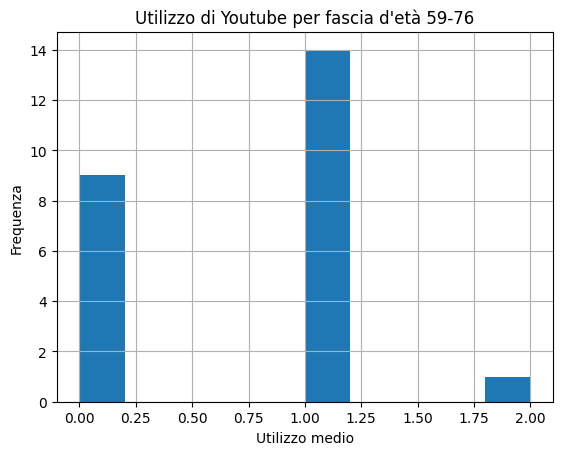

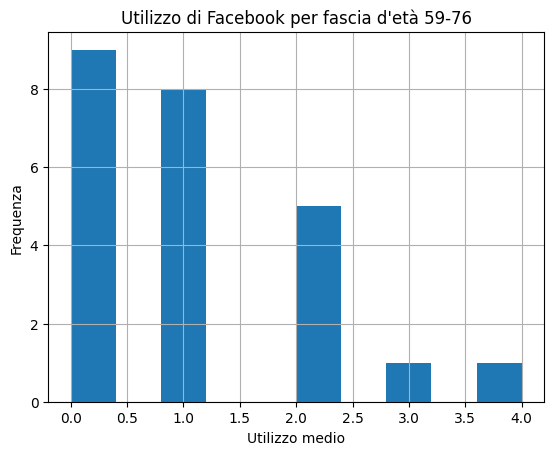

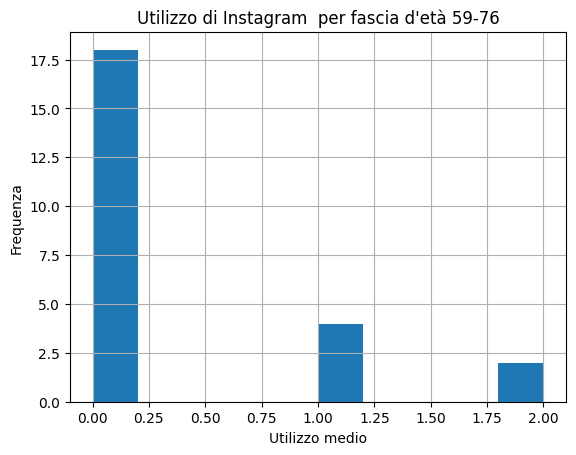

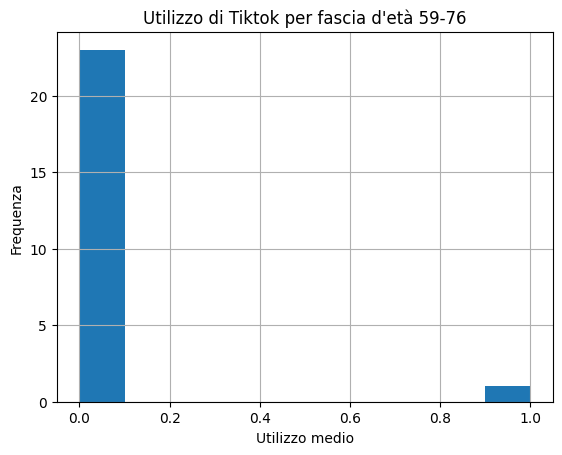

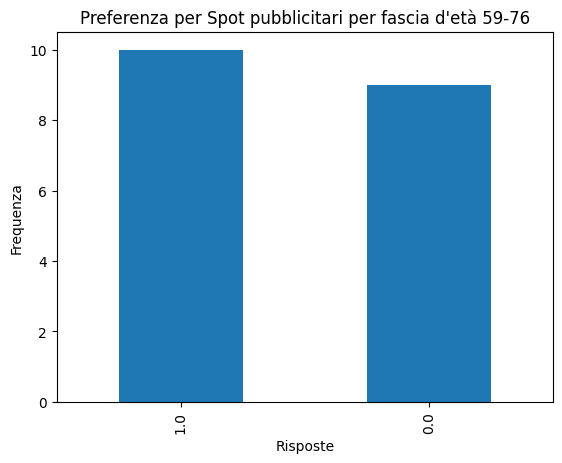

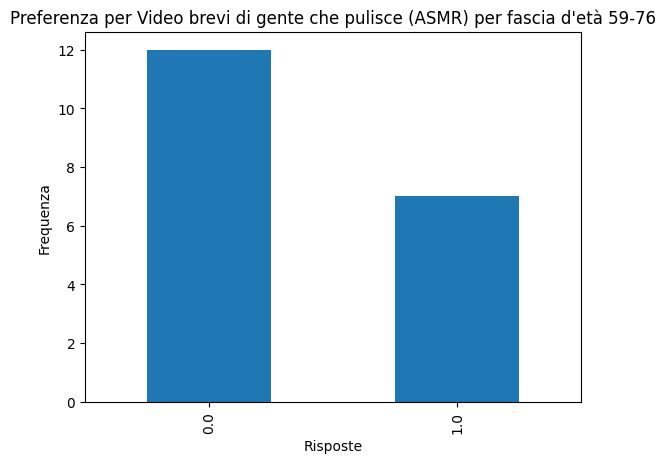

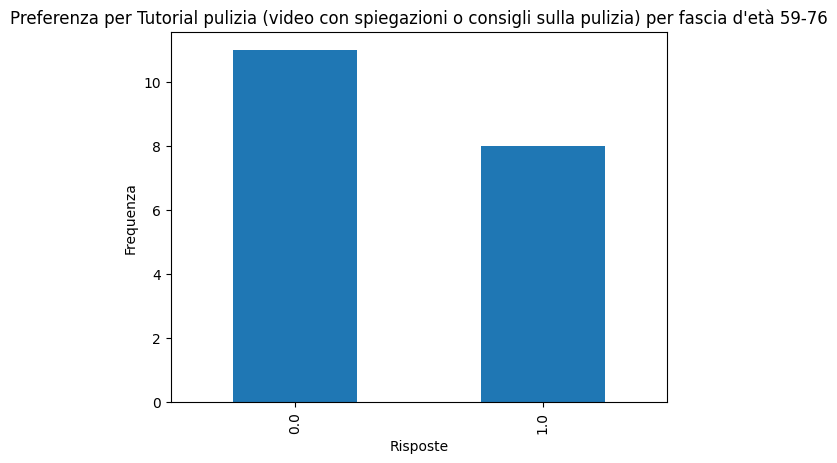

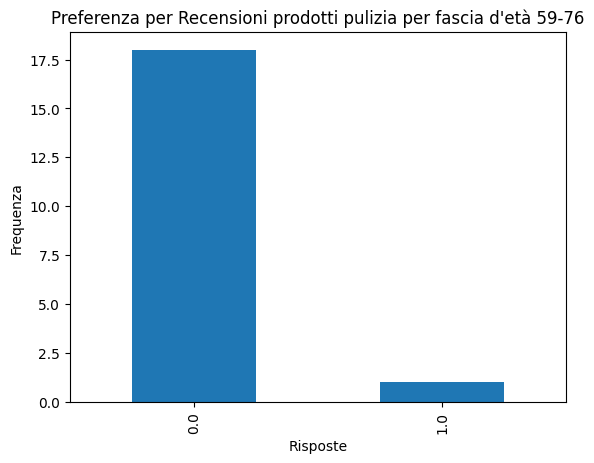

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Mappa per le etichette di età
eta_map = {
    0: "18-26",
    1: "43-58",
    2: "27-42",
    3: "59-76"
}

# Per ogni categoria di età
for categoria_eta, fascia_eta in eta_map.items():
    # Filtra il DataFrame per quella categoria d'età
    df_fascia = df[df['Età:\xa0'] == categoria_eta]

    # Calcola e salva i grafici per l'utilizzo dei diversi dispositivi
    dispositivi = ['TV', 'Radio', 'Computer', 'Smartphone ']
    for dispositivo in dispositivi:
        col_name = f'Quali di questi dispositivi utilizzi di più?\xa0  [{dispositivo}]'
        plt.figure()
        df_fascia[col_name].value_counts().plot(kind='bar')
        plt.title(f'Utilizzo di {dispositivo} per fascia d\'età {fascia_eta}')
        plt.xlabel('Risposte')
        plt.ylabel('Frequenza')
        plt.savefig(f'/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Carrellata/Utilizzo_{dispositivo}_Eta_{fascia_eta}.png')

    # Salva i grafici delle ore di visione TV e ascolto radio, se pertinenti
    if 'TV' in dispositivi:
        plt.figure()
        df_fascia['Quante ore al giorno guardi la TV?'].hist()
        plt.title(f'Ore di visione TV per fascia d\'età {fascia_eta}')
        plt.xlabel('Ore al giorno')
        plt.ylabel('Frequenza')
        plt.savefig(f'/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Carrellata/Ore_TV_Eta_{fascia_eta}.png')

    if 'Radio' in dispositivi:
        plt.figure()
        df_fascia['Quante ore al giorno ascolti la radio?'].hist()
        plt.title(f'Ore di ascolto radio per fascia d\'età {fascia_eta}')
        plt.xlabel('Ore al giorno')
        plt.ylabel('Frequenza')
        plt.savefig(f'/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Carrellata/Ore_Radio_Eta_{fascia_eta}.png')

    # Salva i grafici dell'utilizzo dei social network per chi usa Computer o Smartphone
    if 'Computer' in dispositivi or 'Smartphone ' in dispositivi:
        social_networks = ['Youtube', 'Facebook', 'Instagram ', 'Tiktok']
        for sn in social_networks:
            col_name = f'Quanto utilizzi in media i seguenti social network? [{sn}]'
            plt.figure()
            df_fascia[col_name].hist()
            plt.title(f'Utilizzo di {sn} per fascia d\'età {fascia_eta}')
            plt.xlabel('Utilizzo medio')
            plt.ylabel('Frequenza')
            plt.savefig(f'/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Carrellata/Social_{sn}_Eta_{fascia_eta}.png')

    # Salva i grafici delle preferenze sui contenuti di pulizia sui social network
    if df_fascia['Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)'].mean() > 0:
        tipologie_contenuti = [
            'Spot pubblicitari',
            'Video brevi di gente che pulisce (ASMR)',
            'Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)',
            'Recensioni prodotti pulizia'
        ]
        for tipo in tipologie_contenuti:
            col_name = f'Se sì, che tipologie di contenuto? [{tipo}]'
            plt.figure()
            df_fascia[col_name].value_counts().plot(kind='bar')
            plt.title(f'Preferenza per {tipo} per fascia d\'età {fascia_eta}')
            plt.xlabel('Risposte')
            plt.ylabel('Frequenza')
            plt.savefig(f'/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Carrellata/Contenuti_Pulizia_{tipo}_Eta_{fascia_eta}.png')

In [9]:
list(df.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [10]:
# Raggruppare per età e calcolare le statistiche aggregate solo sulle colonne di interesse
agg_df = df.groupby('Età:\xa0').agg({
    'Quali di questi dispositivi utilizzi di più?\xa0  [TV]': 'mean',
    'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]': 'mean',
    'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]': 'mean',
    'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]': 'mean',
    'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)': 'mean',
    'Se sì, che tipologie di contenuto? [Spot pubblicitari]': 'mean',
    'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]': 'mean',
    'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]': 'mean',
    'Se sì, che tipologie di contenuto? [Recensioni prodotti pulizia]': 'mean'
}).reset_index()


# Mappatura dell'età
mappa_età = {
    0: "18-26",
    1: "27-42",
    2: "43-58",
    3: "59-76"
}

# Applica la mappatura alla colonna "Età" in agg_df
agg_df['Età:\xa0'] = agg_df['Età:\xa0'].replace(mappa_età)

agg_df.head()


,Età:,Quali di questi dispositivi utilizzi di più? [TV],Quali di questi dispositivi utilizzi di più? [Radio],Quali di questi dispositivi utilizzi di più? [Computer],Quali di questi dispositivi utilizzi di più? [Smartphone ],"Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)","Se sì, che tipologie di contenuto? [Spot pubblicitari]","Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]","Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]","Se sì, che tipologie di contenuto? [Recensioni prodotti pulizia]"
0,18-26,0.103704,0.000000,0.503704,0.962963,0.859259,0.456897,0.698276,0.439655,0.189655
1,27-42,0.376812,0.014493,0.318841,0.884058,0.869565,0.466667,0.550000,0.566667,0.166667
2,43-58,0.398230,0.053097,0.274336,0.734513,0.716814,0.432099,0.469136,0.604938,0.209877
3,59-76,0.875000,0.000000,0.125000,0.416667,0.791667,0.526316,0.368421,0.421053,0.052632


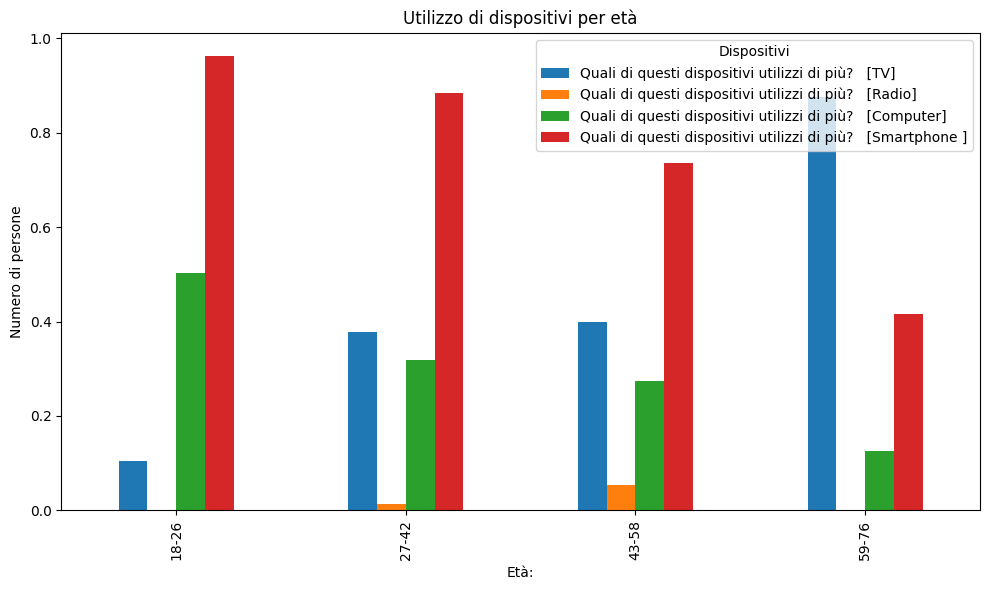

In [11]:
import matplotlib.pyplot as plt

# Creare un DataFrame con solo le prime 5 colonne
df1 = agg_df.iloc[:, 0:5]


# Grafico a barre raggruppato per confrontare i valori delle colonne tra le diverse età
df_plot = df1.set_index('Età:\xa0')
ax = df_plot.plot(kind='bar', figsize=(10, 6))  # Imposta le dimensioni del grafico

# Etichette degli assi e titolo
plt.xlabel('Età:')
plt.ylabel('Numero di persone')
plt.title('Utilizzo di dispositivi per età')

# Regola la posizione della legenda
ax.legend(title='Dispositivi', loc='upper right')

# Regola il layout del grafico
plt.tight_layout()

# Salvare il grafico
percorso_salvataggio_grafico = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/grafico.png'
plt.savefig(percorso_salvataggio_grafico)

# Salvare la porzione di tabella
percorso_salvataggio_tabella = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Quale mezzo di comunicazione si usa maggiormente.csv'
df_plot.to_csv(percorso_salvataggio_tabella)

# Mostrare il grafico
plt.show()

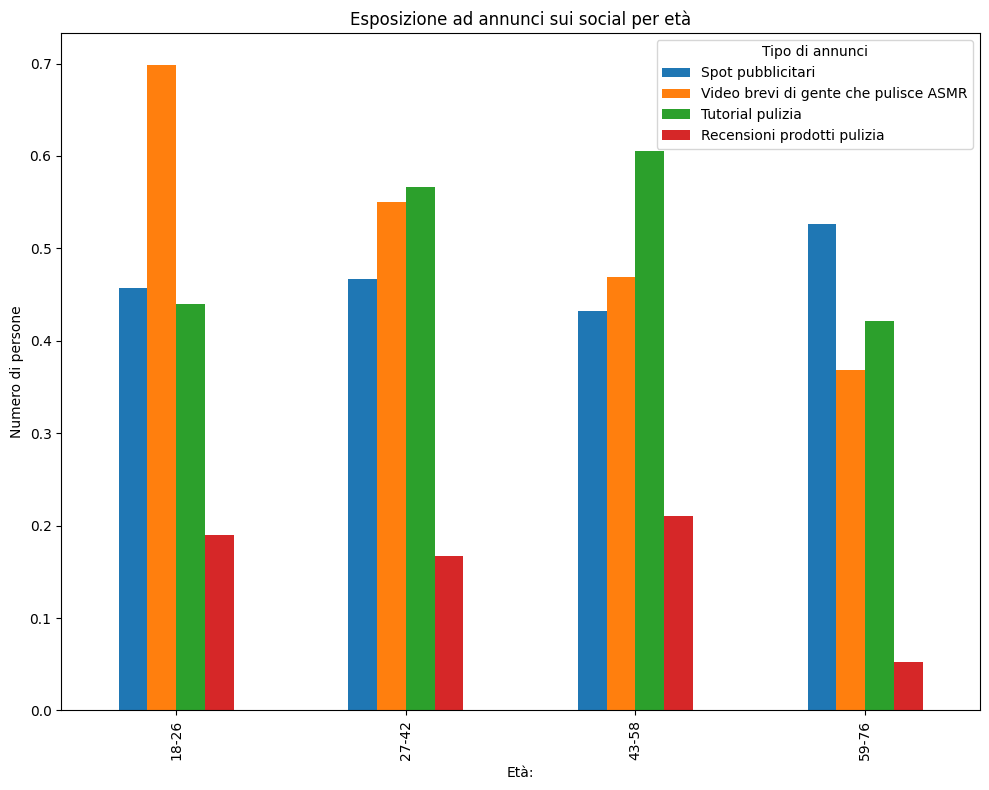

In [12]:
# df3 contains the last 4 columns of agg_df
df3 = agg_df.iloc[:, 6:10]

# Aggiungi la colonna 'Età:\xa0' a df3
df3['Età:\xa0'] = agg_df['Età:\xa0']

# Definisci le etichette della legenda
etichette_legenda = ["Spot pubblicitari", "Video brevi di gente che pulisce ASMR", "Tutorial pulizia", "Recensioni prodotti pulizia"]

# Grafico a barre raggruppato per confrontare i valori delle colonne tra le diverse età
df_plot = df3.set_index('Età:\xa0')
ax = df_plot.plot(kind='bar', figsize=(10, 8))  # Imposta le dimensioni del grafico

# Etichette degli assi e titolo
plt.xlabel('Età:')
plt.ylabel('Numero di persone')
plt.title('Esposizione ad annunci sui social per età')

# Imposta le etichette personalizzate per la legenda
ax.legend(etichette_legenda, title='Tipo di annunci', loc='upper right')

# Regola il layout del grafico
plt.tight_layout()

# Salvare il grafico
percorso_salvataggio_grafico = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/pub_esposizione.png'
plt.savefig(percorso_salvataggio_grafico)

# Salvare la porzione di tabella
percorso_salvataggio_tabella = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/A quale tipo di annunci sei più esposto.csv'
df_plot.to_csv(percorso_salvataggio_tabella)

# Mostrare il grafico
plt.show()


In [13]:
# Seleziona solo le colonne desiderate dal DataFrame df
agg_df2 = df.groupby('Età:\xa0').agg({
    'Quante ore al giorno guardi la TV?': 'mean',
    'Quanto utilizzi in media i seguenti social network? [Youtube]': 'mean',
    'Quanto utilizzi in media i seguenti social network? [Facebook]': 'mean',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]': 'mean',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]': 'mean',
}).reset_index()


# Mappatura dell'età
mappa_età = {
    0: "18-26",
    1: "27-42",
    2: "43-58",
    3: "59-76"
}

# Applica la mappatura alla colonna "Età" in agg_df
agg_df2['Età:\xa0'] = agg_df2['Età:\xa0'].replace(mappa_età)

#change all the NaN values to 0
agg_df2 = agg_df2.fillna(0)

agg_df2.head()


,Età:,Quante ore al giorno guardi la TV?,Quanto utilizzi in media i seguenti social network? [Youtube],Quanto utilizzi in media i seguenti social network? [Facebook],Quanto utilizzi in media i seguenti social network? [Instagram ],Quanto utilizzi in media i seguenti social network? [Tiktok]
0,18-26,1.071429,1.407407,0.629630,2.281481,1.296296
1,27-42,1.307692,1.086957,1.217391,1.405797,0.318841
2,43-58,1.488889,0.920354,1.168142,0.743363,0.300885
3,59-76,1.809524,0.666667,1.041667,0.333333,0.041667


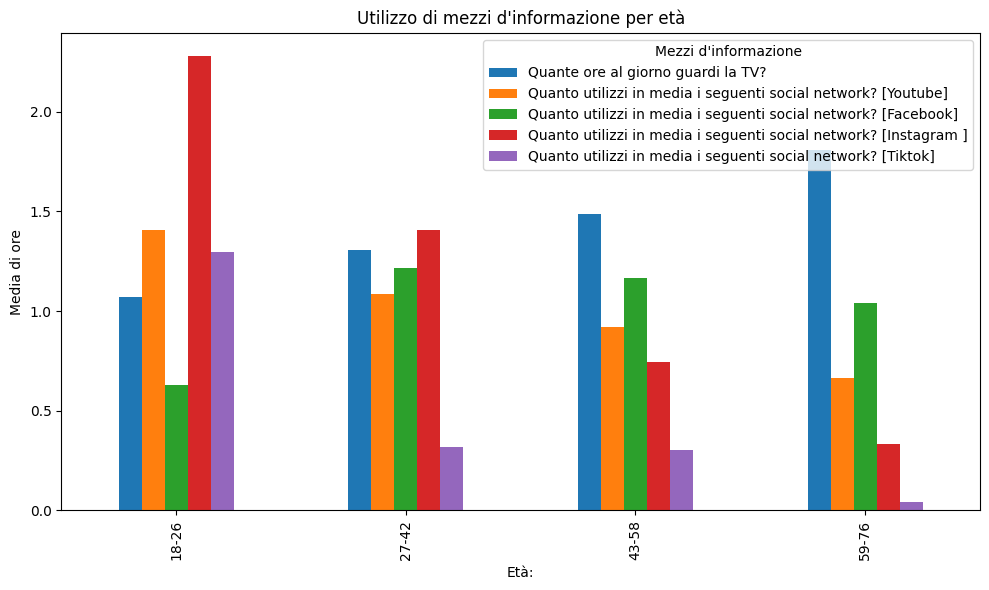

In [14]:
import matplotlib.pyplot as plt

# Creare un DataFrame con solo le prime 5 colonne
df1 = agg_df2

# Grafico a barre raggruppato per confrontare i valori delle colonne tra le diverse età
df_plot = df1.set_index('Età:\xa0')
ax = df_plot.plot(kind='bar', figsize=(10, 6))  # Imposta le dimensioni del grafico

# Etichette degli assi e titolo
plt.xlabel('Età:')
plt.ylabel('Media di ore')
plt.title("Utilizzo di mezzi d'informazione per età")

# Regola la posizione della legenda
ax.legend(title="Mezzi d'informazione", loc='upper right')

# Regola il layout del grafico
plt.tight_layout()

# Salvare il grafico
percorso_salvataggio_grafico = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/grafico_mezzinf.png'
plt.savefig(percorso_salvataggio_grafico)

# Salvare la porzione di tabella
percorso_salvataggio_tabella = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Mezzo di comunicazione/Quale mezzo di informazione si usa maggiormente.csv'
df_plot.to_csv(percorso_salvataggio_tabella)

# Mostrare il grafico
plt.show()

    XGBoost per vedere se le variabili correlano con la variabile target
    

In [16]:
agg_df.head()
agg_df.to_csv('agg_df.csv', index=False)

Accuracy: 0.5752212389380531
              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60        54
         1.0       0.62      0.49      0.55        59

    accuracy                           0.58       113
   macro avg       0.58      0.58      0.57       113
weighted avg       0.58      0.58      0.57       113



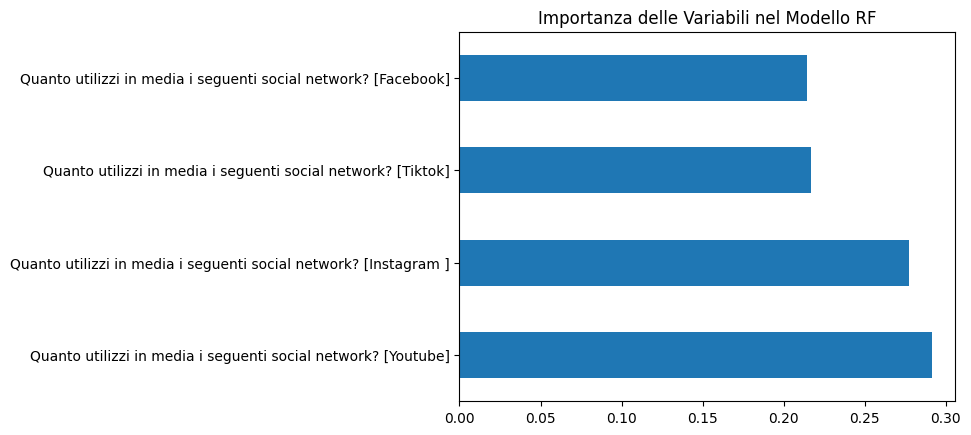

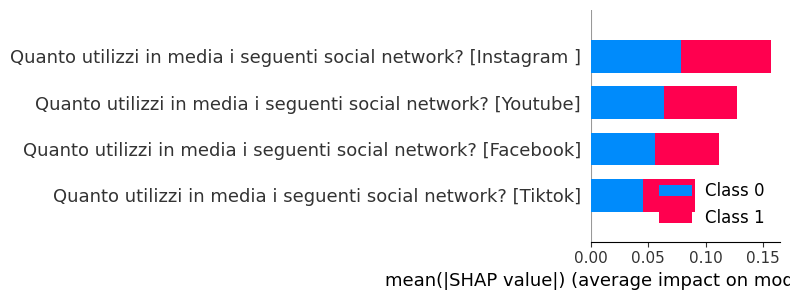

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import shap

df1 = df.copy()
#from df1 drop all the rows with NaN values in the columns of interest ['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]'], ['Se sì, che tipologie di contenuto? [Spot pubblicitari]']]
df1 = df1.dropna(subset=['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]', 'Se sì, che tipologie di contenuto? [Spot pubblicitari]'], axis=0)

# Esempio di regressione logistica per una delle variabili binarie
X = df1[['Quanto utilizzi in media i seguenti social network? [Youtube]',
        'Quanto utilizzi in media i seguenti social network? [Facebook]',
        'Quanto utilizzi in media i seguenti social network? [Instagram ]',
        'Quanto utilizzi in media i seguenti social network? [Tiktok]']]
y = df1['Se sì, che tipologie di contenuto? [Spot pubblicitari]']

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestramento del modello Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predizioni e valutazione del modello
predictions = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Importanza delle variabili
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(len(X.columns)).plot(kind='barh')
plt.title('Importanza delle Variabili nel Modello RF')
plt.show()

# Creazione dell'oggetto SHAP Explainer
explainer = shap.TreeExplainer(rf)

# Calcolo dei valori SHAP per il set di test
shap_values = explainer.shap_values(X_test)

# Visualizzazione del sommario dei valori SHAP
shap.summary_plot(shap_values, X_test)

              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53        54
         1.0       0.55      0.47      0.51        59

    accuracy                           0.52       113
   macro avg       0.52      0.52      0.52       113
weighted avg       0.53      0.52      0.52       113



[12:55:17] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


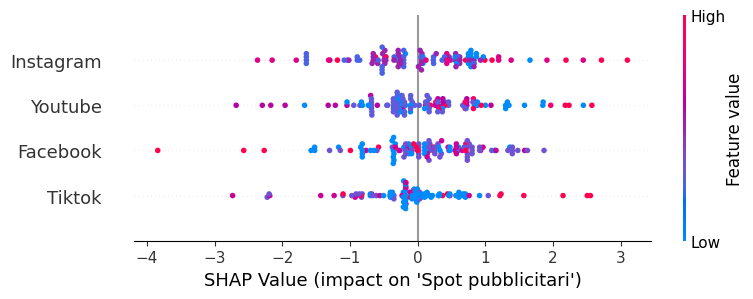

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import XGBClassifier

df1 = df.copy()
#from df1 drop all the rows with NaN values in the columns of interest ['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]'], ['Se sì, che tipologie di contenuto? [Spot pubblicitari]']]
df1 = df1.dropna(subset=['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]', 'Se sì, che tipologie di contenuto? [Spot pubblicitari]'], axis=0)
# Rinomina le colonne del DataFrame
df1 = df1.rename(columns={
    'Quanto utilizzi in media i seguenti social network? [Youtube]': 'Youtube',
    'Quanto utilizzi in media i seguenti social network? [Facebook]': 'Facebook',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]': 'Instagram',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]': 'Tiktok',
    'Se sì, che tipologie di contenuto? [Spot pubblicitari]': 'Spot pubblicitari'
})

# Esempio di regressione logistica per una delle variabili binarie
X = df1[['Youtube',
        'Facebook',
        'Instagram',
        'Tiktok']]
y = df1['Spot pubblicitari']

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Procedi con l'addestramento del modello XGBoost come prima
xgboost_model = XGBClassifier(
    learning_rate=0.3,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgboost_model.fit(X_train, y_train)

# Predizioni e valutazione del modello
xgboost_predictions = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, xgboost_predictions)

# Generazione del classification report
classification_rep = classification_report(y_test, xgboost_predictions)

# Stampa del classification report
print(classification_rep)

# Creazione dell'oggetto SHAP Explainer
explainer = shap.Explainer(xgboost_model)

# Calcolo dei valori SHAP
shap_values = explainer(X_test)

# Visualizzazione SHAP senza mostrare immediatamente il grafico
shap.summary_plot(shap_values, X_test, show=False)

# Impostazione dell'etichetta dell'asse x e mostrare il grafico
plt.xlabel("SHAP Value (impact on 'Spot pubblicitari')")
plt.show()

              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47        51
         1.0       0.58      0.63      0.60        62

    accuracy                           0.55       113
   macro avg       0.54      0.54      0.54       113
weighted avg       0.55      0.55      0.55       113



[12:55:33] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[12:55:34] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


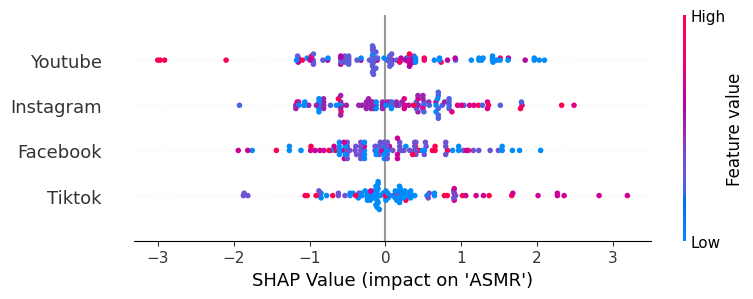

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import XGBClassifier

df1 = df.copy()
#from df1 drop all the rows with NaN values in the columns of interest ['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]'], ['Se sì, che tipologie di contenuto? [Spot pubblicitari]']]
df1 = df1.dropna(subset=['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]', 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]'], axis=0)
# Rinomina le colonne del DataFrame
df1 = df1.rename(columns={
    'Quanto utilizzi in media i seguenti social network? [Youtube]': 'Youtube',
    'Quanto utilizzi in media i seguenti social network? [Facebook]': 'Facebook',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]': 'Instagram',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]': 'Tiktok',
    'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]': 'ASMR'
})

# Esempio di regressione logistica per una delle variabili binarie
X = df1[['Youtube',
        'Facebook',
        'Instagram',
        'Tiktok']]
y = df1['ASMR']

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Procedi con l'addestramento del modello XGBoost come prima
xgboost_model = XGBClassifier(
    learning_rate=0.3,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgboost_model.fit(X_train, y_train)

# Predizioni e valutazione del modello
xgboost_predictions = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, xgboost_predictions)

# Generazione del classification report
classification_rep = classification_report(y_test, xgboost_predictions)

# Stampa del classification report
print(classification_rep)

# Creazione dell'oggetto SHAP Explainer
explainer = shap.Explainer(xgboost_model)

# Calcolo dei valori SHAP
shap_values = explainer(X_test)

# Visualizzazione SHAP senza mostrare immediatamente il grafico
shap.summary_plot(shap_values, X_test, show=False)

# Impostazione dell'etichetta dell'asse x e mostrare il grafico
plt.xlabel("SHAP Value (impact on 'ASMR')")
plt.show()

              precision    recall  f1-score   support

         0.0       0.53      0.39      0.45        66
         1.0       0.38      0.51      0.43        47

    accuracy                           0.44       113
   macro avg       0.45      0.45      0.44       113
weighted avg       0.47      0.44      0.44       113



[12:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


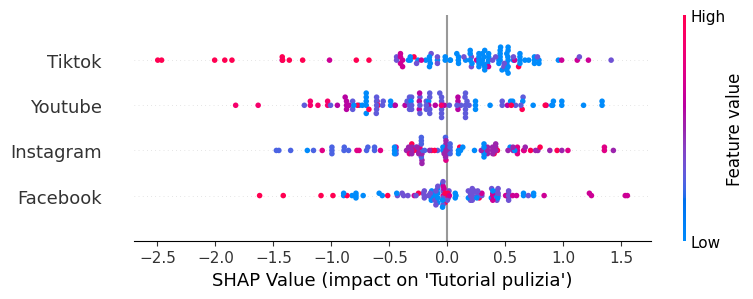

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import XGBClassifier

df1 = df.copy()
#from df1 drop all the rows with NaN values in the columns of interest ['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]'], ['Se sì, che tipologie di contenuto? [Spot pubblicitari]']]
df1 = df1.dropna(subset=['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]', 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]'], axis=0)
# Rinomina le colonne del DataFrame
df1 = df1.rename(columns={
    'Quanto utilizzi in media i seguenti social network? [Youtube]': 'Youtube',
    'Quanto utilizzi in media i seguenti social network? [Facebook]': 'Facebook',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]': 'Instagram',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]': 'Tiktok',
    'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]': 'Spiegazioni'
})

# Esempio di regressione logistica per una delle variabili binarie
X = df1[['Youtube',
        'Facebook',
        'Instagram',
        'Tiktok']]
y = df1['Spiegazioni']

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Procedi con l'addestramento del modello XGBoost come prima
xgboost_model = XGBClassifier(
    learning_rate=0.3,
    max_depth=3,
    n_estimators=200,
    subsample=0.6,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgboost_model.fit(X_train, y_train)

# Predizioni e valutazione del modello
xgboost_predictions = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, xgboost_predictions)

# Generazione del classification report
classification_rep = classification_report(y_test, xgboost_predictions)

# Stampa del classification report
print(classification_rep)

# Creazione dell'oggetto SHAP Explainer
explainer = shap.Explainer(xgboost_model)

# Calcolo dei valori SHAP
shap_values = explainer(X_test)

# Visualizzazione SHAP senza mostrare immediatamente il grafico
shap.summary_plot(shap_values, X_test, show=False)

# Impostazione dell'etichetta dell'asse x e mostrare il grafico
plt.xlabel("SHAP Value (impact on 'Tutorial pulizia')")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definizione dei parametri da testare con la GridSearch
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],  # Profondità massima di ciascun albero
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasso di apprendimento
    'n_estimators': [100, 200, 300, 400],  # Numero di alberi
    'subsample': [0.6, 0.7, 0.8, 0.9]  # Percentuale di campioni utilizzati per addestrare ciascun albero
}

# Creazione del modello XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Creazione della GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

# Addestramento della GridSearchCV con i tuoi dati
grid_search.fit(X_train, y_train)

# Ottenere il miglior modello e i suoi parametri
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Stampa dei risultati
print("Miglior modello: ", best_model)
print("Migliori parametri: ", best_params)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        97
         1.0       0.08      0.06      0.07        16

    accuracy                           0.77       113
   macro avg       0.47      0.47      0.47       113
weighted avg       0.74      0.77      0.76       113



[12:55:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


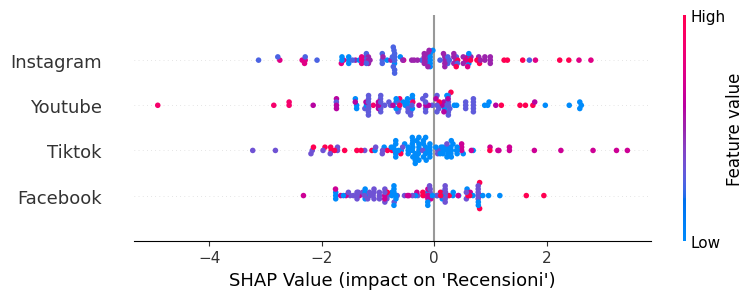

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import XGBClassifier

df1 = df.copy()
#from df1 drop all the rows with NaN values in the columns of interest ['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]'], ['Se sì, che tipologie di contenuto? [Spot pubblicitari]']]
df1 = df1.dropna(subset=['Quanto utilizzi in media i seguenti social network? [Youtube]', 'Quanto utilizzi in media i seguenti social network? [Facebook]', 'Quanto utilizzi in media i seguenti social network? [Instagram ]', 'Quanto utilizzi in media i seguenti social network? [Tiktok]', 'Se sì, che tipologie di contenuto? [Recensioni prodotti pulizia]'], axis=0)
# Rinomina le colonne del DataFrame
df1 = df1.rename(columns={
    'Quanto utilizzi in media i seguenti social network? [Youtube]': 'Youtube',
    'Quanto utilizzi in media i seguenti social network? [Facebook]': 'Facebook',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]': 'Instagram',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]': 'Tiktok',
    'Se sì, che tipologie di contenuto? [Recensioni prodotti pulizia]': 'Recensioni'
})

# Esempio di regressione logistica per una delle variabili binarie
X = df1[['Youtube',
        'Facebook',
        'Instagram',
        'Tiktok']]
y = df1['Recensioni']

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Procedi con l'addestramento del modello XGBoost come prima
xgboost_model = XGBClassifier(
    learning_rate=0.3,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgboost_model.fit(X_train, y_train)

# Predizioni e valutazione del modello
xgboost_predictions = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, xgboost_predictions)

# Generazione del classification report
classification_rep = classification_report(y_test, xgboost_predictions)

# Stampa del classification report
print(classification_rep)

# Creazione dell'oggetto SHAP Explainer
explainer = shap.Explainer(xgboost_model)

# Calcolo dei valori SHAP
shap_values = explainer(X_test)

# Visualizzazione SHAP senza mostrare immediatamente il grafico
shap.summary_plot(shap_values, X_test, show=False)

# Impostazione dell'etichetta dell'asse x e mostrare il grafico
plt.xlabel("SHAP Value (impact on 'Recensioni')")
plt.show()

    Analisi di contingenza

In [48]:
from scipy.stats import chi2_contingency
df1 = df.copy()

# Creazione di una funzione per eseguire il test del Chi-quadrato per ogni combinazione di variabili
def run_chi2_test(df, social_media_columns, content_columns):
    results = []
    for social_media in social_media_columns:
        for content in content_columns:
            crosstab = pd.crosstab(df[social_media], df[content])
            chi2, p, dof, expected = chi2_contingency(crosstab)
            results.append({
                'Social Media': social_media,
                'Content Type': content,
                'Chi2': chi2,
                'p-value': p
            })
    return pd.DataFrame(results)

# Elenco delle colonne dei social media e dei tipi di contenuto
social_media_columns = [
    'Quanto utilizzi in media i seguenti social network? [Youtube]',
    'Quanto utilizzi in media i seguenti social network? [Facebook]',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]'
]

content_columns = [
    'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
    'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
    'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
    'Se sì, che tipologie di contenuto? [Recensioni prodotti pulizia]'
]

# Esecuzione del test del Chi-quadrato per tutte le combinazioni
chi2_results = run_chi2_test(df1, social_media_columns, content_columns)
chi2_results.to_csv('chi2_results.csv', index=False)
chi2_results

,Social Media,Content Type,Chi2,p-value
0,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Spot pubbl...",0.868470,0.929040
1,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Video brev...",1.108880,0.892861
2,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Tutorial p...",2.032142,0.729847
3,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Recensioni...",1.731171,0.785048
4,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Spot pubbl...",1.444039,0.836506
5,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Video brev...",4.221605,0.376845
6,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Tutorial p...",4.392173,0.355525
7,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Recensioni...",5.353229,0.252935
8,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Spot pubbl...",3.371321,0.497712
9,Quanto utilizzi in media i seguenti social net...,"Se sì, che tipologie di contenuto? [Video brev...",15.421392,0.003902


    QUI SI ANALIZZA SEZIONE 2 DEL QUESTIONARIO pt.1

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_convertito.csv')

In [75]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia già stato caricato come 'df'

colonne_da_selezionare = [
    'Solitamente acquisti gli stessi prodotti per la pulizia che acquistano i tuoi genitori?',
    'Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?',
    'Ogni quanto tempo riacquisti solitamente lo spray?',
    'In genere che formato preferisci?',
    'Quale marchio acquisti solitamente?',
    'Ti capita mai di acquistare "pacchetti convenienza"? (pacchetti: prodotto+ricarica oppure con più prodotti insieme) ',
    'Quando sei al supermercato odori il prodotto prima di acquistarlo per verificare il profumo?',
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Profumazione ]',
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Efficacia ]',
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Prezzo]',
]

df_selezionato = df[colonne_da_selezionare]

# Definisci il dizionario con l'inverso dei valori
inverso_mapping_marchi = {
    0: "Ace",
    1: 'Altro',
    2: "Chanteclair",
    3: "Cif",
    4: "Smac",
    5: "Viakal"
}

# Applica la sostituzione dei valori nella colonna 'Quale marchio acquisti solitamente?' nel DataFrame selezionato
df_selezionato['Quale marchio acquisti solitamente?'] = df_selezionato['Quale marchio acquisti solitamente?'].replace(inverso_mapping_marchi)

# Esegui il raggruppamento
raggruppamento = df_selezionato.groupby('Quale marchio acquisti solitamente?')

# Ora puoi eseguire operazioni di aggregazione o analisi sui gruppi
# Ad esempio, per ottenere il conteggio di ciascun marchio acquistato solitamente:
conteggio_marchi = raggruppamento.size()

# Oppure per calcolare la media delle altre colonne per ciascun marchio:
media_altre_colonne = raggruppamento.mean()

/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_16632/2821215915.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selezionato['Quale marchio acquisti solitamente?'] = df_selezionato['Quale marchio acquisti solitamente?'].replace(inverso_mapping_marchi)


In [76]:
media_altre_colonne.head()

,Solitamente acquisti gli stessi prodotti per la pulizia che acquistano i tuoi genitori?,Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?,Ogni quanto tempo riacquisti solitamente lo spray?,In genere che formato preferisci?,"Ti capita mai di acquistare ""pacchetti convenienza""? (pacchetti: prodotto+ricarica oppure con più prodotti insieme)",Quando sei al supermercato odori il prodotto prima di acquistarlo per verificare il profumo?,Ordina le seguenti caratteristiche per rilevanza: [Profumazione ],Ordina le seguenti caratteristiche per rilevanza: [Efficacia ],Ordina le seguenti caratteristiche per rilevanza: [Prezzo]
Quale marchio acquisti solitamente?,,,,,,,,,
Ace,0.500000,2.291667,1.805556,0.361111,2.180556,0.763889,1.000000,0.194444,0.680556
Altro,0.313725,2.078431,1.196078,0.294118,1.882353,0.680000,1.020000,0.360000,0.860000
Chanteclair,0.373134,2.276119,1.649254,0.500000,2.059701,0.626866,1.000000,0.300752,0.511278
Cif,0.542857,2.285714,1.657143,0.470588,1.800000,0.823529,1.114286,0.171429,0.600000
Smac,0.478261,2.217391,1.434783,0.478261,1.869565,0.565217,1.136364,0.434783,0.500000


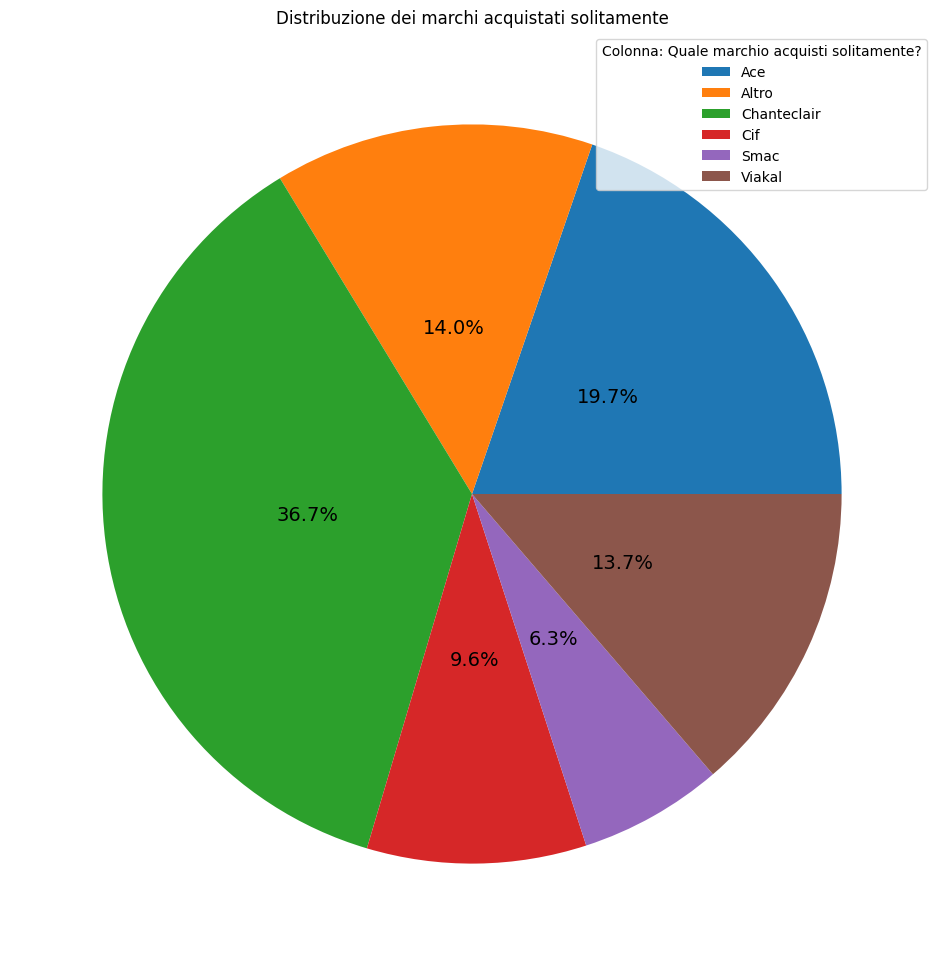

In [61]:
import matplotlib.pyplot as plt

# Supponiamo che 'conteggio_marchi' sia il tuo conteggio dei marchi

# Imposta le dimensioni del grafico
plt.figure(figsize=(16, 12))

# Crea il grafico a torta senza etichette esterne alle categorie
wedges, texts, autotexts = plt.pie(
    conteggio_marchi,
    autopct='%1.1f%%',
    labels=None,
    startangle=0,  # Imposta l'angolo di inizio a 90 gradi (sopra)
    pctdistance=0.45,  # Sposta le etichette all'interno delle fette
    textprops={'fontsize': 14}  # Imposta la dimensione del testo delle percentuali
)

plt.title('Distribuzione dei marchi acquistati solitamente')

# Dizionario di mapping per sostituire i valori numerici con i nomi dei marchi
mapping_marchi = {
    0: "Ace",
    1: "Altro",
    2: "Chanteclair",
    3: "Cif",
    4: "Smac",
    5: "Viakal"
}

# Aggiungi una legenda nell'angolo in alto a destra
legenda = plt.legend([mapping_marchi[val] for val in conteggio_marchi.index], title='Colonna: Quale marchio acquisti solitamente?', loc='upper right', bbox_to_anchor=(1, 1))

# Regola la posizione del grafico a torta spostandolo a sinistra
plt.subplots_adjust(left=0.2)

# Specifica il percorso completo del file in cui vuoi salvare il grafico
percorso_salvataggio = "/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Abitudini di pulizia/grafico_pie.png"

# Salva il grafico nel percorso specificato con la legenda fuori dal box del grafico
plt.savefig(percorso_salvataggio, bbox_extra_artists=(legenda,), bbox_inches='tight')

# Mostra il grafico (opzionale)
plt.show()


In [81]:
media_altre_colonne.columns

Index(['Solitamente acquisti gli stessi prodotti per la pulizia che acquistano i tuoi genitori?',
       'Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?',
       'Ogni quanto tempo riacquisti solitamente lo spray?',
       'In genere che formato preferisci?',
       'Ti capita mai di acquistare "pacchetti convenienza"? (pacchetti: prodotto+ricarica oppure con più prodotti insieme) ',
       'Quando sei al supermercato odori il prodotto prima di acquistarlo per verificare il profumo?',
       'Ordina le seguenti caratteristiche per rilevanza:  [Profumazione ]',
       'Ordina le seguenti caratteristiche per rilevanza:  [Efficacia ]',
       'Ordina le seguenti caratteristiche per rilevanza:  [Prezzo]'],
      dtype='object')

In [89]:
import matplotlib.pyplot as plt

# Seleziona le colonne di interesse nel DataFrame media_altre_colonne
colonne_interesse = [
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Profumazione ]',
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Efficacia ]',
    'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Prezzo]'
]

# Crea un sottodataframe contenente solo le colonne di interesse
df_interesse = media_altre_colonne[colonne_interesse]

# Ribalta i valori sottraendo ogni valore da 3
df_interesse[['Ordina le seguenti caratteristiche per rilevanza:\xa0 [Profumazione ]',
              'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Efficacia ]',
              'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Prezzo]']] = 3 - df_interesse[['Ordina le seguenti caratteristiche per rilevanza:\xa0 [Profumazione ]',
                                                                                                'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Efficacia ]',
                                                                                                'Ordina le seguenti caratteristiche per rilevanza:\xa0 [Prezzo]']]

# Raggruppa per 'Quale marchio acquisti solitamente?' e calcola la media delle altre colonne di interesse
media_per_marchio = df_interesse.groupby('Quale marchio acquisti solitamente?').mean()

media_per_marchio.columns


/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_16632/2712268707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesse[['Ordina le seguenti caratteristiche per rilevanza:\xa0 [Profumazione ]',


Index(['Ordina le seguenti caratteristiche per rilevanza:  [Profumazione ]',
       'Ordina le seguenti caratteristiche per rilevanza:  [Efficacia ]',
       'Ordina le seguenti caratteristiche per rilevanza:  [Prezzo]'],
      dtype='object')

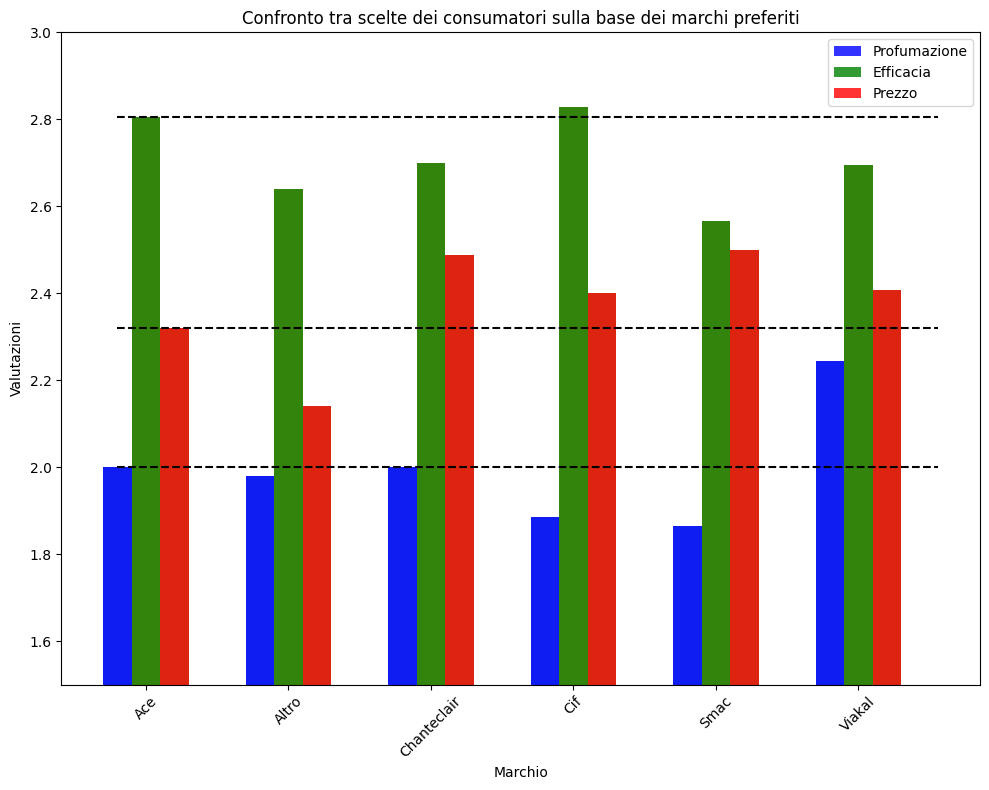

In [107]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Numero di variabili
n_vars = len(media_per_marchio.columns)

# Numero di marchi
n_brands = len(media_per_marchio.index)

# Posizioni dei bar
index = np.arange(n_brands)
bar_width = 0.2
opacity = 0.8

# Disegnare i bar per ogni variabile
for i in range(n_vars):
    ax.bar(index + i * bar_width, media_per_marchio.iloc[:, i], bar_width, alpha=opacity)

# Trovare i valori per la marca "Ace"
valori_ace = media_per_marchio.loc['Ace']

# Disegnare linee orizzontali per i valori di Ace
for i, valore in enumerate(valori_ace):
    # Estendere la linea per tutta la larghezza del grafico
    ax.hlines(valore, xmin=0, xmax=1.6* n_brands * (n_vars * bar_width), colors='black', linestyles='dashed')


# Aggiungere etichette, titolo
ax.set_xlabel('Marchio')
ax.set_ylabel('Valutazioni')
ax.set_title('Confronto tra scelte dei consumatori sulla base dei marchi preferiti')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(media_per_marchio.index)

# Creazione di una legenda che si riferisce alle barre
# Qui si crea un oggetto 'bar' per ogni gruppo di barre e poi si aggiunge alla legenda
bar_objects = []

# Definire una lista di colori per le barre
colori = ['blue', 'green', 'red']  # Sostituisci questi colori con quelli desiderati

for i, col in enumerate(media_per_marchio.columns):
    bar = ax.bar(index + i * bar_width, media_per_marchio[col], bar_width, alpha=opacity, color=colori[i], label=col)
    bar_objects.append(bar)

# Aggiungere la legenda utilizzando gli oggetti 'bar'
ax.legend(bar_objects, ["Profumazione", "Efficacia", "Prezzo"])


# Impostare il limite dell'asse y
ax.set_ylim(1.5, 3)

# Mostrare il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    QUI SI ANALIZZA TEMA GREEN

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_convertito.csv')

In [26]:
#crea un dataset df_green con solo le colonne 'Età:\xa0', 'Genere:', 'Regione di residenza:\xa0''Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?', 'Se sì, le hai acquistate?\xa0', 'Quali?', 'Quali? [Altro]', 'Perché? [Non è così tanto conveniente ]','Perché? [Sono scomode ]','Perché? [Penso non siano ugualmente efficaci ]','Perché? [Altro]',"L'ultimo acquisto che hai fatto era:\xa0",'Quale tipologie di ricarica compreresti?','Quanto sei interessato alle tematiche green da 1 a 5?','Saresti disposto a comprare un prodotto green?
df_green = df[['Età:\xa0', 'Genere:', 'Regione di residenza:\xa0','Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?', 'Se sì, le hai acquistate?\xa0', 'Quali?', 'Quali? [Altro]', 'Perché? [Non è così tanto conveniente ]','Perché? [Sono scomode ]','Perché? [Penso non siano ugualmente efficaci ]','Perché? [Altro]',"L'ultimo acquisto che hai fatto era:\xa0",'Quale tipologie di ricarica compreresti?','Quanto sei interessato alle tematiche green da 1 a 5?','Saresti disposto a comprare un prodotto green?']]

df_green.head()

,Età:,Genere:,Regione di residenza:,"Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?","Se sì, le hai acquistate?",Quali?,Quali? [Altro],Perché? [Non è così tanto conveniente ],Perché? [Sono scomode ],Perché? [Penso non siano ugualmente efficaci ],Perché? [Altro],L'ultimo acquisto che hai fatto era:,Quale tipologie di ricarica compreresti?,Quanto sei interessato alle tematiche green da 1 a 5?,Saresti disposto a comprare un prodotto green?
0,0.0,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,3.0
1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,1.0
2,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#escludendo i valori NaN, dimmi la distribuzione di valori per la colonna 'Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'
df_green['Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'].value_counts(normalize=True) * 100

Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?
1.0    62.406015
0.0    37.593985
Name: proportion, dtype: float64

Età:   Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?
0.0    0.0                                                                      54.814815
       1.0                                                                      45.185185
1.0    1.0                                                                      65.217391
       0.0                                                                      34.782609
2.0    1.0                                                                      76.106195
       0.0                                                                      23.893805
3.0    1.0                                                                      70.833333
       0.0                                                                      29.166667
Name: proportion, dtype: float64


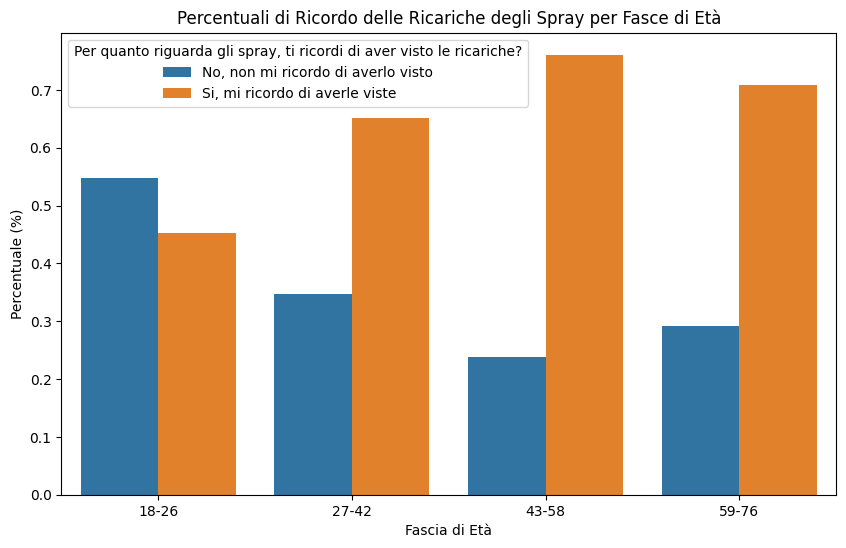

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo delle statistiche relative alla colonna degli spray, suddivise per età
statistics_by_age = df_green.groupby('Età:\xa0')['Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'].value_counts(normalize=True) * 100

# Stampa dei risultati
print(statistics_by_age)

# Calcolo delle percentuali
statistics_by_age_percent = df_green.groupby('Età:\xa0')['Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'].value_counts(normalize=True).rename('percentuale').reset_index()

# Mappatura dei valori 0 e 1 ai nuovi label
label_map = {0: "No, non mi ricordo di averlo visto", 1: "Si, mi ricordo di averle viste"}
statistics_by_age_percent['Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'] = statistics_by_age_percent['Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'].map(label_map)

# Mappatura dei label dell'asse x
age_labels = {
    0.0: "18-26",
    1.0: "27-42",
    2.0: "43-58",
    3.0: "59-76"
}
statistics_by_age_percent['Età:\xa0'] = statistics_by_age_percent['Età:\xa0'].map(age_labels)

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='Età:\xa0', y='percentuale', hue='Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?', data=statistics_by_age_percent)

plt.title('Percentuali di Ricordo delle Ricariche degli Spray per Fasce di Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Percentuale (%)')
plt.show()

In [10]:
df_green.columns

Index(['Età: ', 'Genere:', 'Regione di residenza: ',
       'Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?',
       'Se sì, le hai acquistate? ', 'Quali?', 'Quali? [Altro]',
       'Perché? [Non è così tanto conveniente ]', 'Perché? [Sono scomode ]',
       'Perché? [Penso non siano ugualmente efficaci ]', 'Perché? [Altro]',
       'L'ultimo acquisto che hai fatto era: ',
       'Quale tipologie di ricarica compreresti?',
       'Quanto sei interessato alle tematiche green da 1 a 5?',
       'Saresti disposto a comprare un prodotto green?'],
      dtype='object')

In [ ]:
#escludendo i valori NaN, dimmi la distribuzione di valori per la colonna 'Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?'
df_green['Se sì, le hai acquistate?\xa0'].value_counts(normalize=True) * 100

Età:   Se sì, le hai acquistate? 
0.0    1.0                           73.770492
       0.0                           26.229508
1.0    1.0                           73.333333
       0.0                           26.666667
2.0    1.0                           89.534884
       0.0                           10.465116
3.0    1.0                           76.470588
       0.0                           23.529412
Name: proportion, dtype: float64


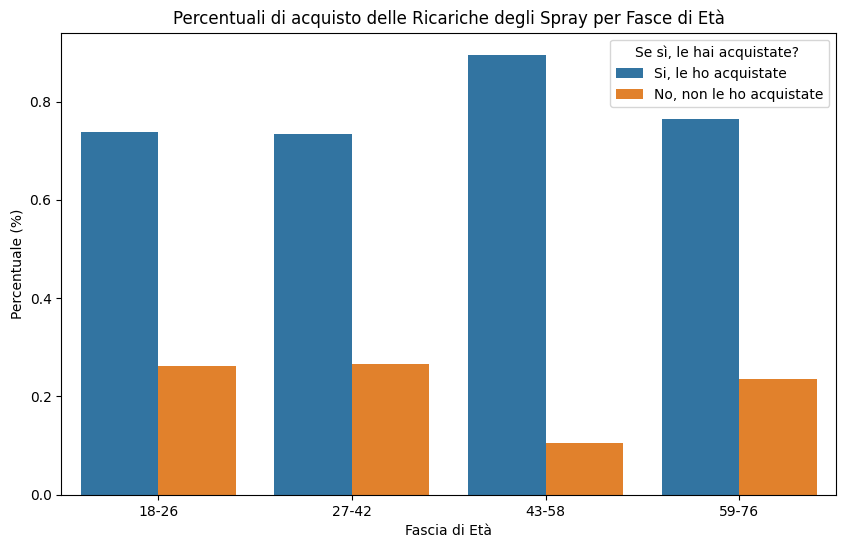

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo delle statistiche relative alla colonna degli spray, suddivise per età
statistics_by_age = df_green.groupby('Età:\xa0')['Se sì, le hai acquistate?\xa0'].value_counts(normalize=True) * 100

# Stampa dei risultati
print(statistics_by_age)

# Calcolo delle percentuali
statistics_by_age_percent = df_green.groupby('Età:\xa0')['Se sì, le hai acquistate?\xa0'].value_counts(normalize=True).rename('percentuale').reset_index()

# Mappatura dei valori 0 e 1 ai nuovi label
label_map = {0: "No, non le ho acquistate", 1: "Si, le ho acquistate"}
statistics_by_age_percent['Se sì, le hai acquistate?\xa0'] = statistics_by_age_percent['Se sì, le hai acquistate?\xa0'].map(label_map)

# Mappatura dei label dell'asse x
age_labels = {
    0.0: "18-26",
    1.0: "27-42",
    2.0: "43-58",
    3.0: "59-76"
}
statistics_by_age_percent['Età:\xa0'] = statistics_by_age_percent['Età:\xa0'].map(age_labels)

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='Età:\xa0', y='percentuale', hue='Se sì, le hai acquistate?\xa0', data=statistics_by_age_percent)

plt.title('Percentuali di acquisto delle Ricariche degli Spray per Fasce di Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Percentuale (%)')
plt.show()

Età:   Quali?
0.0    1.0       93.333333
       3.0        4.444444
       2.0        2.222222
1.0    1.0       78.787879
       3.0       21.212121
2.0    1.0       79.220779
       3.0       14.285714
       2.0        6.493506
3.0    1.0       84.615385
       3.0       15.384615
Name: proportion, dtype: float64


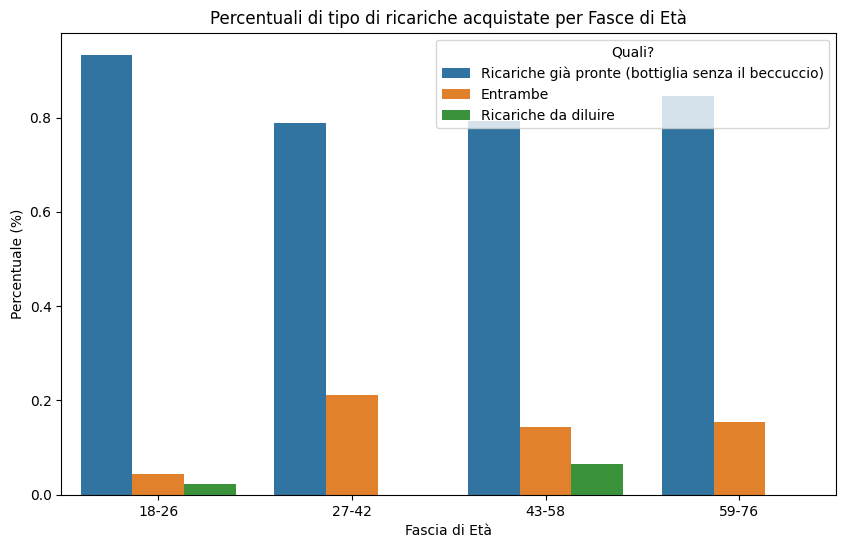

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo delle statistiche relative alla colonna degli spray, suddivise per età
statistics_by_age = df_green.groupby('Età:\xa0')['Quali?'].value_counts(normalize=True) * 100

# Stampa dei risultati
print(statistics_by_age)

# Calcolo delle percentuali
statistics_by_age_percent = df_green.groupby('Età:\xa0')['Quali?'].value_counts(normalize=True).rename('percentuale').reset_index()

# Mappatura dei valori 0 e 1 ai nuovi label
label_map = {
    0: "Altro",
    3: "Entrambe",
    2: "Ricariche da diluire",
    1: "Ricariche già pronte (bottiglia senza il beccuccio)"
}
statistics_by_age_percent['Quali?'] = statistics_by_age_percent['Quali?'].map(label_map)

# Mappatura dei label dell'asse x
age_labels = {
    0.0: "18-26",
    1.0: "27-42",
    2.0: "43-58",
    3.0: "59-76"
}
statistics_by_age_percent['Età:\xa0'] = statistics_by_age_percent['Età:\xa0'].map(age_labels)

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='Età:\xa0', y='percentuale', hue='Quali?', data=statistics_by_age_percent)

plt.title('Percentuali di tipo di ricariche acquistate per Fasce di Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Percentuale (%)')
plt.show()

In [28]:
# Calcolo della distribuzione di valori per le colonne specificate, escludendo i valori NaN
distribution_1 = df_green['Perché? [Non è così tanto conveniente ]'].dropna().value_counts(normalize=True) * 100
distribution_2 = df_green['Perché? [Sono scomode ]'].dropna().value_counts(normalize=True) * 100
distribution_3 = df_green['Perché? [Penso non siano ugualmente efficaci ]'].dropna().value_counts(normalize=True) * 100

# Creazione di un DataFrame per visualizzare i risultati
distributions = pd.DataFrame({
    'Non è così tanto conveniente': distribution_1,
    'Sono scomode': distribution_2,
    'Non sono ugualmente efficaci': distribution_3,
})

# Stampa dei risultati
print(distributions)


     Non è così tanto conveniente  Sono scomode  Non sono ugualmente efficaci
0.0                     58.695652     73.913043                     91.304348
1.0                     41.304348     26.086957                      8.695652


In [31]:
import pandas as pd

# Calcolo della distribuzione delle risposte per ogni fascia d'età per le colonne specificate
columns_of_interest = [
    'Perché? [Non è così tanto conveniente ]',
    'Perché? [Sono scomode ]',
    'Perché? [Penso non siano ugualmente efficaci ]'
]

# Preparazione di un elenco per raccogliere i risultati
results = []

for age_group in df_green['Età:\xa0'].unique():
    for col in columns_of_interest:
        # Calcolo della distribuzione percentuale per ciascuna fascia d'età
        distribution = df_green[df_green['Età:\xa0'] == age_group][col].value_counts(normalize=True) * 100
        # Aggiunta dei risultati all'elenco
        for response, percent in distribution.items():
            results.append({
                'Fascia di Età': age_group,
                'Domanda': col,
                'Risposta': response,
                'Percentuale': percent
            })

# Conversione dell'elenco in un DataFrame
age_group_distributions = pd.DataFrame(results)


age_group_distributions.head()

,Fascia di Età,Domanda,Risposta,Percentuale
0,0.0,Perché? [Non è così tanto conveniente ],0.0,68.75
1,0.0,Perché? [Non è così tanto conveniente ],1.0,31.25
2,0.0,Perché? [Sono scomode ],0.0,81.25
3,0.0,Perché? [Sono scomode ],1.0,18.75
4,0.0,Perché? [Penso non siano ugualmente efficaci ],0.0,100.00


/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/381649812.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_age_group_distributions['Fascia di Età'] = filtered_age_group_distributions['Fascia di Età'].map(age_labels)
/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/381649812.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_age_group_distributions['Domanda'] = filtered_age_group_distributions['Domanda'].map(question_labels)


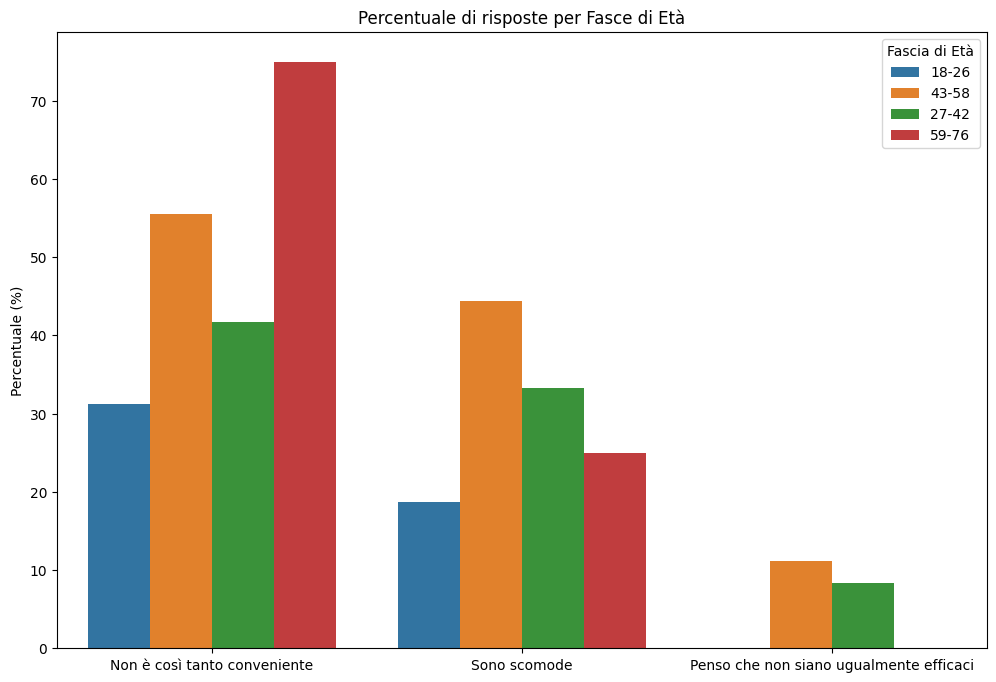

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminazione delle righe dove la Risposta è 0
filtered_age_group_distributions = age_group_distributions[age_group_distributions['Risposta'] != 0]

# Mappatura dei label dell'asse x per le fasce d'età
age_labels = {
    0.0: "18-26",
    1.0: "27-42",
    2.0: "43-58",
    3.0: "59-76"
}
filtered_age_group_distributions['Fascia di Età'] = filtered_age_group_distributions['Fascia di Età'].map(age_labels)

# Mappatura dei label delle domande
question_labels = {
    'Perché? [Non è così tanto conveniente ]': 'Non è così tanto conveniente',
    'Perché? [Sono scomode ]': 'Sono scomode',
    'Perché? [Penso non siano ugualmente efficaci ]': 'Penso che non siano ugualmente efficaci'
}
filtered_age_group_distributions['Domanda'] = filtered_age_group_distributions['Domanda'].map(question_labels)

# Filtraggio per risposte nella categoria 1.0
category_1_distributions = filtered_age_group_distributions[filtered_age_group_distributions['Risposta'] == 1.0]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
sns.barplot(x='Domanda', y='Percentuale', hue='Fascia di Età', data=category_1_distributions)

plt.title('Percentuale di risposte per Fasce di Età')
plt.xlabel('')
plt.ylabel('Percentuale (%)')
plt.xticks(rotation=0)
plt.legend(title='Fascia di Età')
plt.show()


    TEMA GREEN PARTE 2


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_convertito.csv')

#crea un dataset df_green con solo le colonne 'Età:\xa0', 'Genere:', 'Regione di residenza:\xa0''Per quanto riguarda gli spray, ti ricordi di aver visto le ricariche?', 'Se sì, le hai acquistate?\xa0', 'Quali?', 'Quali? [Altro]', 'Perché? [Non è così tanto conveniente ]','Perché? [Sono scomode ]','Perché? [Penso non siano ugualmente efficaci ]','Perché? [Altro]',"L'ultimo acquisto che hai fatto era:\xa0",'Quale tipologie di ricarica compreresti?','Quanto sei interessato alle tematiche green da 1 a 5?','Saresti disposto a comprare un prodotto green?
df_green = df[['Età:\xa0', 'Genere:', 'Quanto sei interessato alle tematiche green da 1 a 5?','Saresti disposto a comprare un prodotto green?', 'Ti capita mai di acquistare "pacchetti convenienza"? (pacchetti: prodotto+ricarica oppure con più prodotti insieme) ', 'Saresti disposto a comprare un prodotto green?']]

df_green.head()

,Età:,Genere:,Quanto sei interessato alle tematiche green da 1 a 5?,Saresti disposto a comprare un prodotto green?,"Ti capita mai di acquistare ""pacchetti convenienza""? (pacchetti: prodotto+ricarica oppure con più prodotti insieme)",Saresti disposto a comprare un prodotto green?
0,0.0,0.0,3.0,3.0,3.0,3.0
1,NaN,NaN,3.0,1.0,1.0,1.0
2,NaN,NaN,3.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_green.columns

Index(['Età: ', 'Genere:',
       'Quanto sei interessato alle tematiche green da 1 a 5?',
       'Saresti disposto a comprare un prodotto green?',
       'Ti capita mai di acquistare "pacchetti convenienza"? (pacchetti: prodotto+ricarica oppure con più prodotti insieme) '],
      dtype='object')

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd

# Sostituisci 'df' con il nome del tuo DataFrame
variables = [
    'Età:\xa0', 'Genere:',
    'Quanto sei interessato alle tematiche green da 1 a 5?',
    'Saresti disposto a comprare un prodotto green?',
    'Ti capita mai di acquistare "pacchetti convenienza"? (pacchetti: prodotto+ricarica oppure con più prodotti insieme) '
]

# Preparazione di una lista per raccogliere i risultati
results = []

# Esecuzione del test del Chi-quadrato per tutte le combinazioni di variabili
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        crosstab = pd.crosstab(df[variables[i]], df[variables[j]])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        results.append({
            'Variabile A': variables[i],
            'Variabile B': variables[j],
            'Chi2': chi2,
            'p-value': p
        })

# Conversione dei risultati in un DataFrame
chi2_results = pd.DataFrame(results)

# Stampa dei risultati
chi2_results

,Variabile A,Variabile B,Chi2,p-value
0,Età:,Genere:,23.243764,7.188142e-04
1,Età:,Quanto sei interessato alle tematiche green da...,13.468497,3.359270e-01
2,Età:,Saresti disposto a comprare un prodotto green?,10.790812,2.903207e-01
3,Età:,"Ti capita mai di acquistare ""pacchetti conveni...",18.064809,3.442904e-02
4,Genere:,Quanto sei interessato alle tematiche green da...,14.479298,7.009684e-02
5,Genere:,Saresti disposto a comprare un prodotto green?,17.281696,8.301861e-03
6,Genere:,"Ti capita mai di acquistare ""pacchetti conveni...",29.076039,5.885385e-05
7,Quanto sei interessato alle tematiche green da...,Saresti disposto a comprare un prodotto green?,97.244247,1.926237e-15
8,Quanto sei interessato alle tematiche green da...,"Ti capita mai di acquistare ""pacchetti conveni...",12.847138,3.802486e-01
9,Saresti disposto a comprare un prodotto green?,"Ti capita mai di acquistare ""pacchetti conveni...",13.665953,1.347139e-01


In [59]:
# Calcolo delle percentuali di 'Saresti disposto a comprare un prodotto green?' rispetto al 'Genere'
green_purchase_by_gender = df.groupby('Genere:')['Saresti disposto a comprare un prodotto green?'].value_counts(normalize=True).rename('percentuale').reset_index()

# Conversione delle percentuali in formato percentuale
green_purchase_by_gender['percentuale'] *= 100

# Stampa dei risultati
print(green_purchase_by_gender)

green_purchase_by_gender.to_csv('green_last.csv', index=False)

    Genere:  Saresti disposto a comprare un prodotto green?  percentuale
0       0.0                                             3.0    47.169811
1       0.0                                             1.0    32.830189
2       0.0                                             2.0    17.358491
3       0.0                                             0.0     2.641509
4       1.0                                             2.0    50.000000
5       1.0                                             1.0    25.000000
6       1.0                                             3.0    25.000000
7       2.0                                             1.0    55.555556
8       2.0                                             3.0    27.777778
9       2.0                                             2.0    12.500000
10      2.0                                             0.0     4.166667


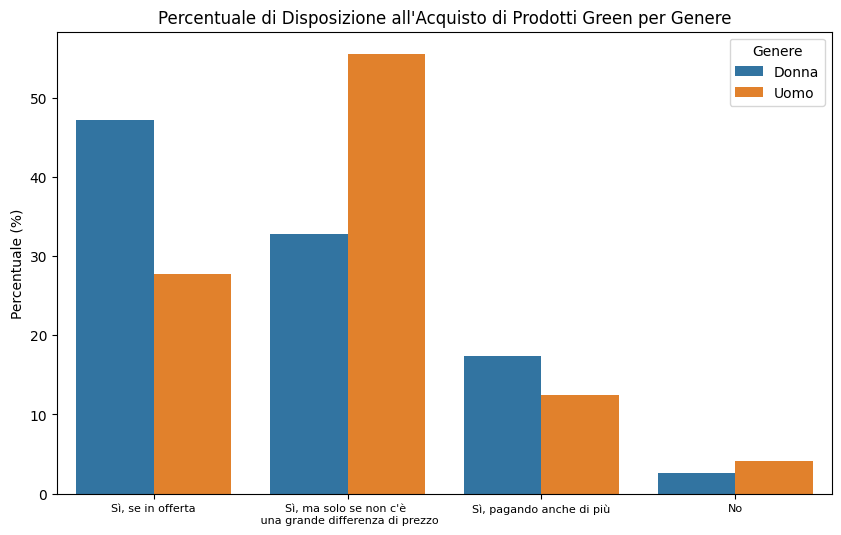

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento del dataset
df_green = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/green_last.csv')  # Sostituisci con il percorso corretto del file

#delete from df_green all the rows where Genere: is1.0
df_green = df_green[df_green['Genere:'] != 1.0]

# Mappatura dei label del genere
gender_labels = {0: "Donna", 1.0: "Preferisco non specificare", 2.0: "Uomo"}
df_green['Genere:'] = df_green['Genere:'].map(gender_labels)

response_labels = {
    0: "No",
    1: "Sì, ma solo se non c'è \n una grande differenza di prezzo",
    2: "Sì, pagando anche di più",
    3: "Sì, se in offerta"
}
df_green['Saresti disposto a comprare un prodotto green?'] = df_green['Saresti disposto a comprare un prodotto green?'].map(response_labels)


# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='Saresti disposto a comprare un prodotto green?', y='percentuale', hue='Genere:', data=df_green)

plt.title('Percentuale di Disposizione all\'Acquisto di Prodotti Green per Genere')
plt.xlabel('')
plt.ylabel('Percentuale (%)')
plt.legend(title='Genere')
plt.xticks(rotation=0, fontsize=8)
plt.show()


    DESCRIZIONE DEL PRODOTTO ACE

In [87]:
df = pd.read_csv('dataset_convertito.csv')

In [74]:
#df_ace is df with only the columns 
columns_to_include = [
    'Quali prodotti hai utilizzato?\xa0 [Sgrassatore Universale]',
    'Quali prodotti hai utilizzato?\xa0 [Sgrassatore Cucina]',
    'Quali prodotti hai utilizzato?\xa0 [Sgrassatore Igienizzante ]',
    'Quali prodotti hai utilizzato?\xa0 [Sgrassatore Igienizzante con candeggina]',
    'Quali prodotti hai utilizzato?\xa0 [Ace Bagno brillante ]',
    'Quali prodotti hai utilizzato?\xa0 [Ace Bagno con candeggina ]',
    'Quali prodotti hai utilizzato?\xa0 [Ace candeggina + mousse ]',
    'Quali prodotti hai utilizzato?\xa0 [Ace candeggina + oxygen]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Profumazione ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Efficacia ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Rapporto qualità/prezzo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Facilità di risciacquo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Efficacia contro gli aloni]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Profumazione ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Efficacia ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Rapporto qualità/prezzo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Facilità di risciacquo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Efficacia contro gli aloni]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Profumazione ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Efficacia ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Rapporto qualità/prezzo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Facilità di risciacquo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Efficacia contro gli aloni]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Profumazione ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Efficacia ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Rapporto qualità/prezzo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Facilità di risciacquo]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Efficacia contro gli aloni]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Profumazione ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Efficacia ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Rapporto qualità/prezzo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Facilità di risciacquo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Aggressività prodotto sulla pelle ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Efficacia contro gli aloni]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Profumazione ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Efficacia ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Rapporto qualità/prezzo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Facilità di risciacquo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Aggressività prodotto sulla pelle ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Efficacia contro gli aloni]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Profumazione ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Efficacia ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Rapporto qualità/prezzo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Facilità di risciacquo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Efficacia contro gli aloni]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Profumazione ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Efficacia ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Rapporto qualità/prezzo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Facilità di risciacquo]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ]',
 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Efficacia contro gli aloni]',
 'Il getto di questi spray è:  \xa0 ',
 'Il getto di questi spray è:  \xa0  [Altro]',
 'Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0',
 'Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Qualità del prodotto ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Marchio di fiducia ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Innovazioni]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Non è giustificato ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Altro]',
 'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? ["Pacchetti convenienza" con più prodotti a prezzo ridotto]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne "compri due paghi uno"]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Altro]',
 'Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche\xa0',
 'Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche\xa0 [Altro]',
 'Lo riacquisteresti?\xa0',
 'Lo riacquisteresti?\xa0 [Altro]',
 'Lo consiglieresti a un amico/a'
]

df_ace = df[columns_to_include]

In [75]:
df_ace.head()

,Quali prodotti hai utilizzato? [Sgrassatore Universale],Quali prodotti hai utilizzato? [Sgrassatore Cucina],Quali prodotti hai utilizzato? [Sgrassatore Igienizzante ],Quali prodotti hai utilizzato? [Sgrassatore Igienizzante con candeggina],Quali prodotti hai utilizzato? [Ace Bagno brillante ],Quali prodotti hai utilizzato? [Ace Bagno con candeggina ],Quali prodotti hai utilizzato? [Ace candeggina + mousse ],Quali prodotti hai utilizzato? [Ace candeggina + oxygen],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale [Profumazione ],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale [Efficacia ],...,Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?,Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti],"Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [""Pacchetti convenienza"" con più prodotti a prezzo ridotto]","Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne ""compri due paghi uno""]",Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Altro],Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche,Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche [Altro],Lo riacquisteresti?,Lo riacquisteresti? [Altro],Lo consiglieresti a un amico/a
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_ace.columns

Index(['Quali prodotti hai utilizzato?  [Sgrassatore Universale]',
       'Quali prodotti hai utilizzato?  [Sgrassatore Cucina]',
       'Quali prodotti hai utilizzato?  [Sgrassatore Igienizzante ]',
       'Quali prodotti hai utilizzato?  [Sgrassatore Igienizzante con candeggina]',
       'Quali prodotti hai utilizzato?  [Ace Bagno brillante ]',
       'Quali prodotti hai utilizzato?  [Ace Bagno con candeggina ]',
       'Quali prodotti hai utilizzato?  [Ace candeggina + mousse ]',
       'Quali prodotti hai utilizzato?  [Ace candeggina + oxygen]',
       'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale  [Profumazione ]',
       'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale  [Efficacia ]',
       'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale  [Rapporto qualità/prezzo]',
       'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale  [Facilità di risciacquo]',
       'Valuta l

In [82]:
# Creo un dizionario per mappare ogni prodotto alle sue caratteristiche
mapping = {
    'Ace Sgrassatore Universale': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Efficacia contro gli aloni]',
    },
    # Altri prodotti saranno aggiunti qui
}

# Aggiungo le altre righe per gli altri prodotti
mapping.update({
    'Ace Sgrassatore Cucina': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Efficacia contro gli aloni]'
    },
    # Altri prodotti
})

# Aggiungo le altre righe per gli altri prodotti
mapping.update({
    'Ace Sgrassatore Igienizzante': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Efficacia contro gli aloni]'
    },
    # Altri prodotti
    'Ace Sgrassatore Igienizzante con candeggina': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Efficacia contro gli aloni]'
    },
    # Altri prodotti
    'Ace Bagno Brillante': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Efficacia contro gli aloni]'
    },
    # Altri prodotti
    'Ace Bagno con candeggina': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Efficacia contro gli aloni]'
    },
    # Altri prodotti
    'Ace Candeggina Più Spray +mousse': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Efficacia contro gli aloni]'
    },
    # Altri prodotti
    'Ace Candeggina Più Spray +oxygen': {
        'Profumazione': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Profumazione ]',
        'Efficacia': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Efficacia ]',
        'Rapporto qualità/prezzo': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Rapporto qualità/prezzo]',
        'Facilità di risciacquo': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Facilità di risciacquo]',
        'Aggressività prodotto sulla pelle': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ]',
        'Efficacia contro gli aloni': 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Efficacia contro gli aloni]'
    },
})

# Calcolo il valore medio per ogni caratteristica di ogni prodotto
mean_values = {}
for product, features in mapping.items():
    mean_values[product] = {}
    for feature, column in features.items():
        mean_values[product][feature] = df_ace[column].mean()

# Creo un nuovo DataFrame dai valori medi
df_mean = pd.DataFrame(mean_values)

# Traspongo il DataFrame per avere i prodotti a sinistra e le caratteristiche in alto
df_mean = df_mean.T

df_mean.head(10)  # Mostra le prime righe per un'anteprima

,Profumazione,Efficacia,Rapporto qualità/prezzo,Facilità di risciacquo,Aggressività prodotto sulla pelle,Efficacia contro gli aloni
Ace Sgrassatore Universale,3.000000,3.681416,3.127273,3.419643,2.865385,3.354545
Ace Sgrassatore Cucina,3.225352,3.661972,3.140845,3.528571,2.867647,3.550725
Ace Sgrassatore Igienizzante,3.112676,3.535211,3.367647,3.442857,2.938462,3.318182
Ace Sgrassatore Igienizzante con candeggina,3.135802,3.783133,3.432099,3.444444,3.263158,3.358974
Ace Bagno Brillante,3.031250,3.303030,3.093750,3.242424,3.000000,3.366667
Ace Bagno con candeggina,3.152174,3.860215,3.265957,3.563830,3.517241,3.483516
Ace Candeggina Più Spray +mousse,3.264151,3.618182,3.301887,3.381818,3.372549,3.510204
Ace Candeggina Più Spray +oxygen,3.285714,3.642857,3.214286,3.642857,3.384615,3.307692


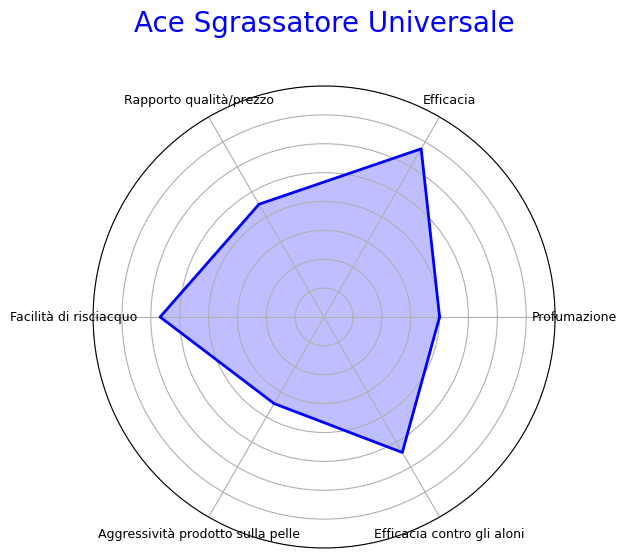

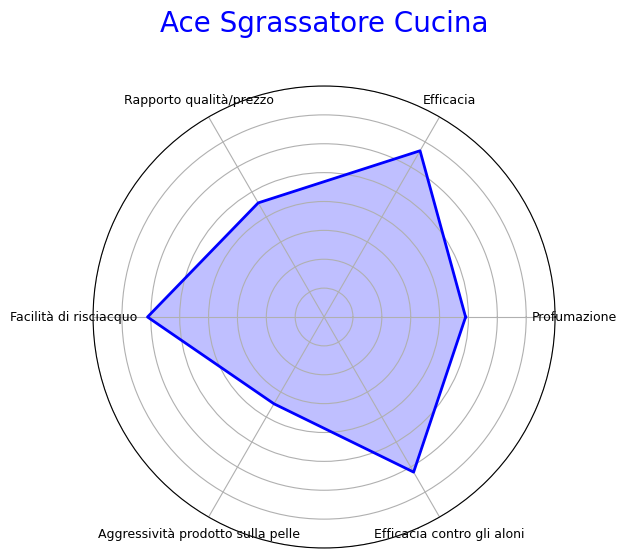

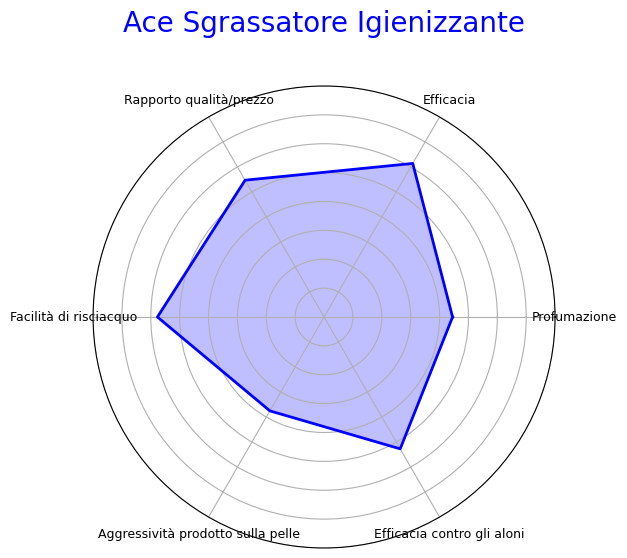

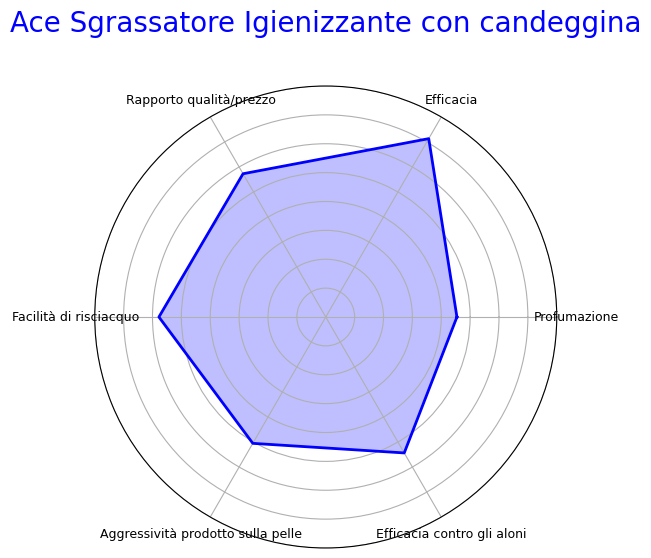

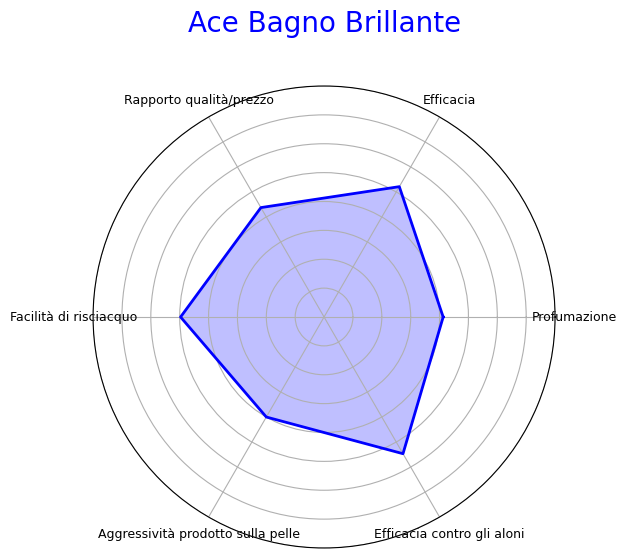

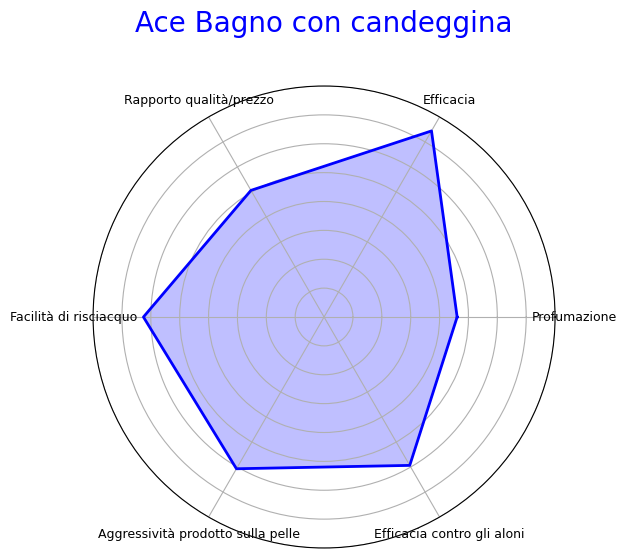

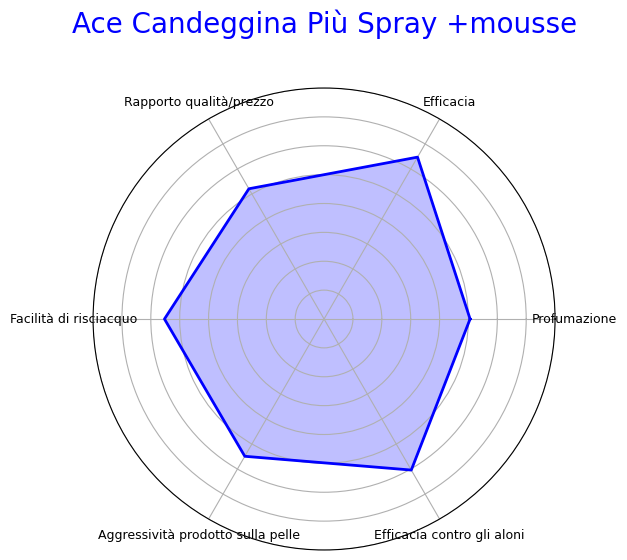

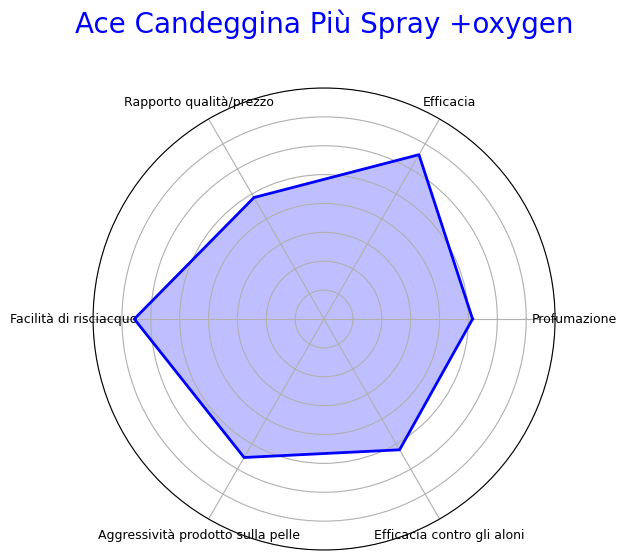

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Modifico la funzione per creare un radar chart per un prodotto con scale da 0 a 5
def create_radar_chart(product, features, values):
    # Numero di variabili
    num_vars = len(features)

    # Angoli per ogni asse nel plot (dividiamo il cerchio completo in parti uguali)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Il grafico è circolare, quindi dobbiamo "chiudere il cerchio"
    values = values.tolist()
    values += values[:1]
    angles += angles[:1]

    # Inizializzazione del radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Imposto i limiti per l'asse radiale da 0 a 5
    ax.set_ylim(2, 4)

    # Disegno delle linee per ogni asse e dei valori
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    

    # Etichette per ogni asse
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, color='black', size=9)

    # Titolo del grafico
    plt.title(product, size=20, color='blue', y=1.1)

    plt.show()

# Creazione dei radar charts per ogni prodotto
for product in df_mean.index:
    create_radar_chart(product, df_mean.columns, df_mean.loc[product].values)




In [95]:
# Modifico la funzione per salvare i radar charts anziché visualizzarli
def save_radar_chart(product, features, values, save_path):
    # Numero di variabili
    num_vars = len(features)

    # Angoli per ogni asse nel plot (dividiamo il cerchio completo in parti uguali)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Il grafico è circolare, quindi dobbiamo "chiudere il cerchio"
    values = values.tolist()
    values += values[:1]
    angles += angles[:1]

    # Inizializzazione del radar chart
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Imposto i limiti per l'asse radiale da 0 a 5
    ax.set_ylim(2, 4)

    # Disegno delle linee per ogni asse e dei valori
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Etichette per ogni asse
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, color='black', size=12)

    # Titolo del grafico
    plt.title(product, size=20, color='blue', y=1.1)

    # Salvare il grafico
    plt.savefig(f"{save_path}/{product.replace(' ', '_')}_radar_chart.png")
    plt.close()

# Directory accessibile dove posso salvare i radar charts
save_path_accessible = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace'

# Creazione della directory se non esiste
import os
os.makedirs(save_path_accessible, exist_ok=True)

# Creazione e salvataggio dei radar charts per ogni prodotto
saved_files = []
for product in df_mean.index:
    file_name = f"{product.replace(' ', '_')}_radar_chart.png"
    save_radar_chart(product, df_mean.columns, df_mean.loc[product].values, save_path_accessible)
    saved_files.append(f"{save_path_accessible}/{file_name}")

saved_files

['/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Sgrassatore_Universale_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Sgrassatore_Cucina_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Sgrassatore_Igienizzante_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Sgrassatore_Igienizzante_con_candeggina_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Bagno_Brillante_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Bagno_con_candeggina_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Descrizione-Ace/Ace_Candeggina_Più_Spray_+mousse_radar_chart.png',
 '/Users/peppus00/Desktop/Progetto ARM/Analisi dat

    #GETTO E PREZZO

In [111]:
#df_ace is df with only the columns 
columns_to_include = [
 'Il getto di questi spray è:  \xa0 ',
 'Il getto di questi spray è:  \xa0  [Altro]',
 'Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0',
 'Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Qualità del prodotto ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Marchio di fiducia ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Innovazioni]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Non è giustificato ]',
 'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?\xa0 [Altro]',
 'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? ["Pacchetti convenienza" con più prodotti a prezzo ridotto]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne "compri due paghi uno"]',
 'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Altro]',
 'Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche\xa0',
 'Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche\xa0 [Altro]',
 'Lo riacquisteresti?\xa0',
 'Lo riacquisteresti?\xa0 [Altro]',
 'Lo consiglieresti a un amico/a',
 'Età:\xa0',
 'Regione di residenza:\xa0'
]

df_ace_price = df[columns_to_include]

In [112]:
df_ace_price.head() 

,Il getto di questi spray è:,Il getto di questi spray è: [Altro],Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?,"Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?",Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo? [Qualità del prodotto ],Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo? [Marchio di fiducia ],Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo? [Innovazioni],Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo? [Non è giustificato ],Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo? [Altro],Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?,...,"Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [""Pacchetti convenienza"" con più prodotti a prezzo ridotto]","Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne ""compri due paghi uno""]",Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Altro],Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche,Saresti disposto/a a spendere di più per prodotti Ace Spray se ci fossero miglioramenti o nuove caratteristiche [Altro],Lo riacquisteresti?,Lo riacquisteresti? [Altro],Lo consiglieresti a un amico/a,Età:,Regione di residenza:
0,2.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,...,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0,14.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    GETTO DI ACE SPRAY

In [98]:
#vedi la distribuzione in percentuale delle risposte alla domanda Il getto di questi spray è:  \xa0
df_ace_price['Il getto di questi spray è:  \xa0 '].value_counts(normalize=True) * 100

Il getto di questi spray è:    
2.0    87.677725
1.0     6.635071
0.0     5.687204
Name: proportion, dtype: float64

    PREZZO DI ACE SPRAY

In [115]:
df_ace_price.columns

Index(['Il getto di questi spray è:    ',
       'Il getto di questi spray è:     [Altro]',
       'Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato? ',
       'Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?',
       'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?  [Qualità del prodotto ]',
       'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?  [Marchio di fiducia ]',
       'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?  [Innovazioni]',
       'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?  [Non è giustificato ]',
       'Quali aspetti dei prodotti Ace Spray giustificano secondo te il prezzo?  [Altro]',
       'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?',
       'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione 

In [107]:
# Mappatura fornita
mapping = {
    "Buono": 0,
    "Eccellente": 1,
    "Molto scarso": 2,
    "Non so": 3,
    "Sufficiente": 4
}

# Invertire la mappatura
inverse_mapping = {v: k for k, v in mapping.items()}

# Applicare la mappatura invertita alla colonna specifica
mappata_colonna = df_ace_price['Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato? '].map(inverse_mapping)

# Mappatura fornita
mapping = {
    "Buono": 3,
    "Eccellente": 4,
    "Molto scarso": 0,
    "Non so": 2,
    "Sufficiente": 1
}

mappata_colonna= mappata_colonna.map(mapping)

# Calcolare il valore percentuale per ciascun valore mappato
percentuale_valori = mappata_colonna.value_counts(normalize=True) * 100

# Visualizzare i risultati
percentuale_valori

Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato? 
3.0    55.506608
1.0    28.193833
4.0    12.334802
2.0     3.083700
0.0     0.881057
Name: proportion, dtype: float64

In [108]:
# Valori forniti per il calcolo della media ponderata
valori = {
    3.0: 55.506608,
    1.0: 28.193833,
    4.0: 12.334802,
    # 2.0: 3.083700, # Questo valore è escluso come richiesto
    0.0: 0.881057
}

# Calcolo della media ponderata escludendo la categoria 2.0
# Il calcolo è somma(valore * peso) / somma(pesi)
numeratore = sum(valore * peso for valore, peso in valori.items())
denominatore = sum(valori.values())

media_ponderata = numeratore / denominatore
media_ponderata

2.518181822871901

In [133]:
# Mappatura fornita
mapping = {
    "Buono": 0,
    "Eccellente": 1,
    "Molto scarso": 2,
    "Non so": 3,
    "Sufficiente": 4
}

# Invertire la mappatura
inverse_mapping = {v: k for k, v in mapping.items()}

# Raggruppare in base a 'Età:' e calcolare la distribuzione dei valori per la variabile di interesse
distribuzione_per_eta = df_ace_price.groupby('Età:\xa0')['Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0'].value_counts(normalize=True) * 100

# Applicare la mappatura invertita solo ai valori della variabile di interesse
distribuzione_invertita_per_eta = distribuzione_per_eta.reset_index(level=1)
distribuzione_invertita_per_eta['Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0'] = distribuzione_invertita_per_eta['Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0'].map(inverse_mapping)

# Ristabilire l'indice
distribuzione_invertita_per_eta = distribuzione_invertita_per_eta.set_index('Come valuti il rapporto qualità-prezzo dei prodotti Ace Spray rispetto ai prodotti simili sul mercato?\xa0', append=True)

# Visualizzare i risultati
distribuzione_invertita_per_eta

proportion
Età:  Come valuti il rapporto qualità-prezzo dei prod...            
0.0   Buono                                                56.756757
      Sufficiente                                          31.081081
      Eccellente                                            9.459459
      Non so                                                2.702703
1.0   Buono                                                70.212766
      Sufficiente                                          14.893617
      Eccellente                                           10.638298
      Molto scarso                                          2.127660
      Non so                                                2.127660
2.0   Buono                                                46.153846
      Sufficiente                                          33.333333
      Eccellente                                           15.384615
      Non so                                                3.846154
      Molto scarso                                          1.282051
3.0   Buono                                                64.285714
      Sufficiente                                          21.428571
      Eccellente                                            7.142857
      Non so                                                7.142857

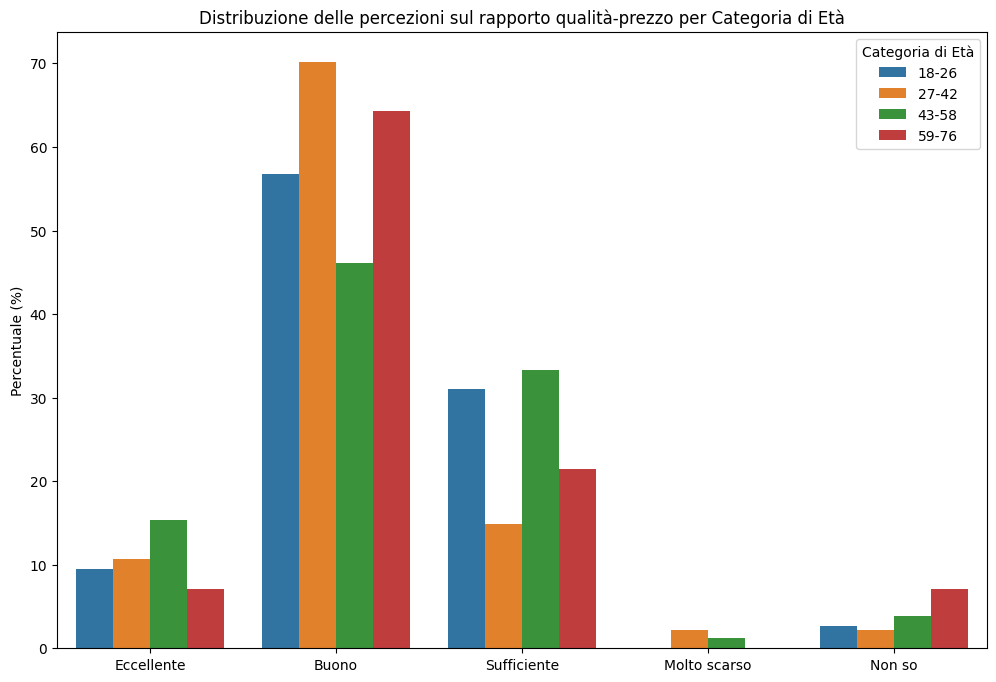

In [137]:
# Creare un DataFrame di esempio basato sui valori forniti
data = {
    'Età': ['0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '3.0', '3.0', '3.0', '3.0'],
    'Valutazione': ['Buono', 'Sufficiente', 'Eccellente', 'Non so', 'Buono', 'Sufficiente', 'Eccellente', 'Molto scarso', 'Non so', 'Buono', 'Sufficiente', 'Eccellente', 'Non so', 'Molto scarso', 'Buono', 'Sufficiente', 'Eccellente', 'Non so'],
    'Percentuale': [56.756757, 31.081081, 9.459459, 2.702703, 70.212766, 14.893617, 10.638298, 2.127660, 2.127660, 46.153846, 33.333333, 15.384615, 3.846154, 1.282051, 64.285714, 21.428571, 7.142857, 7.142857]
}

df_esempio = pd.DataFrame(data)

# Creare il grafico a barre comparate
# Mappatura fornita per l'età
mapping_eta = {
    "18-26": 0,
    "27-42": 1,
    "43-58": 2,
    "59-76": 3
}

# Invertire la mappatura
inverse_mapping_eta = {v: k for k, v in mapping_eta.items()}

# Applicare la mappatura invertita ai label dell'età nel DataFrame
df_esempio['Età'] = df_esempio['Età'].astype(float).map(inverse_mapping_eta)

ordine_eta_invertito = ['18-26', '27-42', '43-58', '59-76']

# Applicare il nuovo ordine al DataFrame
df_esempio['Età'] = pd.Categorical(df_esempio['Età'], categories=ordine_eta_invertito, ordered=True)
df_esempio = df_esempio.sort_values(by=['Età'])

# Ordinare le valutazioni nel seguente ordine: Eccellente, Buono, Sufficiente, Molto scarso, Non so
ordine_valutazioni = ['Eccellente', 'Buono', 'Sufficiente', 'Molto scarso', 'Non so']

# Ordinare i dati in base a questo ordine
df_esempio['Valutazione'] = pd.Categorical(df_esempio['Valutazione'], categories=ordine_valutazioni, ordered=True)
df_esempio = df_esempio.sort_values('Valutazione')

# Creare il grafico a barre comparate con i nuovi label per l'età
plt.figure(figsize=(12, 8))
sns.barplot(x='Valutazione', y='Percentuale', hue='Età', data=df_esempio)


plt.title('Distribuzione delle percezioni sul rapporto qualità-prezzo per Categoria di Età')
plt.xlabel('')
plt.ylabel('Percentuale (%)')
plt.legend(title='Categoria di Età')

plt.show()

In [109]:
# Mappatura fornita
mapping = {
    "Alla pari": 0,
    "Meno costosi": 1,
    "Non lo so": 2,
    "Più costosi": 3
}

# Invertire la mappatura
inverse_mapping = {v: k for k, v in mapping.items()}

mappata_colonna = df_ace_price['Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?'].map(inverse_mapping)

# Mappatura fornita
mapping = {
    "Alla pari": 2,
    "Meno costosi": 1,
    "Non lo so": 0,
    "Più costosi": 3
}

mappata_colonna= mappata_colonna.map(mapping)

# Calcolare il valore percentuale per ciascun valore mappato
percentuale_valori = mappata_colonna.value_counts(normalize=True) * 100

# Visualizzare i risultati
percentuale_valori

Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?
2.0    53.303965
3.0    27.753304
0.0    11.013216
1.0     7.929515
Name: proportion, dtype: float64

In [110]:
valori = {
    2.0: 53.303965,
    3.0: 27.753304,
    0.0: 11.013216,
    1.0: 7.929515
}

numeratore = sum(valore * peso for valore, peso in valori.items())
denominatore = sum(valori.values())

media_ponderata = numeratore / denominatore
media_ponderata

1.9779735700000003

In [138]:
# Mappatura fornita
mapping = {
    "Alla pari": 0,
    "Meno costosi": 1,
    "Non lo so": 2,
    "Più costosi": 3
}

# Invertire la mappatura
inverse_mapping = {v: k for k, v in mapping.items()}

# Raggruppare in base a 'Età:' e calcolare la distribuzione dei valori per la variabile di interesse
distribuzione_per_eta = df_ace_price.groupby('Età:\xa0')['Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?'].value_counts(normalize=True) * 100

# Applicare la mappatura invertita solo ai valori della variabile di interesse
distribuzione_invertita_per_eta = distribuzione_per_eta.reset_index(level=1)
distribuzione_invertita_per_eta['Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?'] = distribuzione_invertita_per_eta['Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?'].map(inverse_mapping)

# Ristabilire l'indice
distribuzione_invertita_per_eta = distribuzione_invertita_per_eta.set_index('Percepisci i prodotti Ace Spray come più costosi, meno costosi o alla pari rispetto ai prodotti concorrenti?', append=True)

# Visualizzare i risultati
distribuzione_invertita_per_eta

proportion
Età:  Percepisci i prodotti Ace Spray come più costos...            
0.0   Alla pari                                            40.540541
      Più costosi                                          36.486486
      Non lo so                                            12.162162
      Meno costosi                                         10.810811
1.0   Alla pari                                            55.319149
      Più costosi                                          31.914894
      Meno costosi                                          6.382979
      Non lo so                                             6.382979
2.0   Alla pari                                            58.974359
      Più costosi                                          24.358974
      Non lo so                                             8.974359
      Meno costosi                                          7.692308
3.0   Alla pari                                            64.285714
      Non lo so                                            28.571429
      Più costosi                                           7.142857

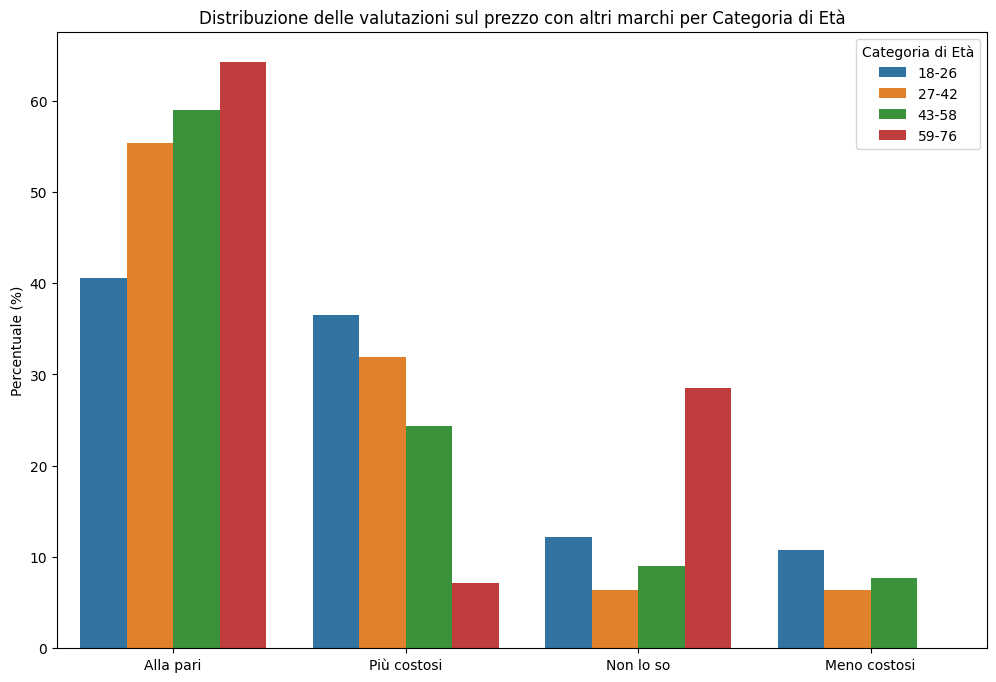

In [141]:
data = {
    'Età': ['0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '3.0', '3.0', '3.0'],
    'Valutazione': ['Alla pari', 'Più costosi', 'Non lo so', 'Meno costosi', 'Alla pari', 'Più costosi', 'Meno costosi', 'Non lo so', 'Alla pari', 'Più costosi', 'Non lo so', 'Meno costosi', 'Alla pari', 'Non lo so', 'Più costosi'],
    'Percentuale': [40.540541, 36.486486, 12.162162, 10.810811, 55.319149, 31.914894, 6.382979, 6.382979, 58.974359, 24.358974, 8.974359, 7.692308, 64.285714, 28.571429, 7.142857]
}

df_esempio = pd.DataFrame(data)

# Creare il grafico a barre comparate
# Mappatura fornita per l'età
mapping_eta = {
    "18-26": 0,
    "27-42": 1,
    "43-58": 2,
    "59-76": 3
}

# Invertire la mappatura
inverse_mapping_eta = {v: k for k, v in mapping_eta.items()}

# Applicare la mappatura invertita ai label dell'età nel DataFrame
df_esempio['Età'] = df_esempio['Età'].astype(float).map(inverse_mapping_eta)

ordine_eta_invertito = ['18-26', '27-42', '43-58', '59-76']

# Applicare il nuovo ordine al DataFrame
df_esempio['Età'] = pd.Categorical(df_esempio['Età'], categories=ordine_eta_invertito, ordered=True)
df_esempio = df_esempio.sort_values(by=['Età'])

# Ordinare le valutazioni nel seguente ordine: Eccellente, Buono, Sufficiente, Molto scarso, Non so
ordine_valutazioni = ['Alla pari', 'Più costosi', 'Non lo so', 'Meno costosi',]

# Ordinare i dati in base a questo ordine
df_esempio['Valutazione'] = pd.Categorical(df_esempio['Valutazione'], categories=ordine_valutazioni, ordered=True)
df_esempio = df_esempio.sort_values('Valutazione')

# Creare il grafico a barre comparate con i nuovi label per l'età
plt.figure(figsize=(12, 8))
sns.barplot(x='Valutazione', y='Percentuale', hue='Età', data=df_esempio)


plt.title('Distribuzione delle valutazioni sul prezzo con altri marchi per Categoria di Età')
plt.xlabel('')
plt.ylabel('Percentuale (%)')
plt.legend(title='Categoria di Età')

plt.show()

    IMPORTANZA DEGLI SCONTI

/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/3883018430.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'] = df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'].replace({2.0: 3.0, 3.0: 2.0})
/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/3883018430.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ace_sconti['Sei solito/a approfittare

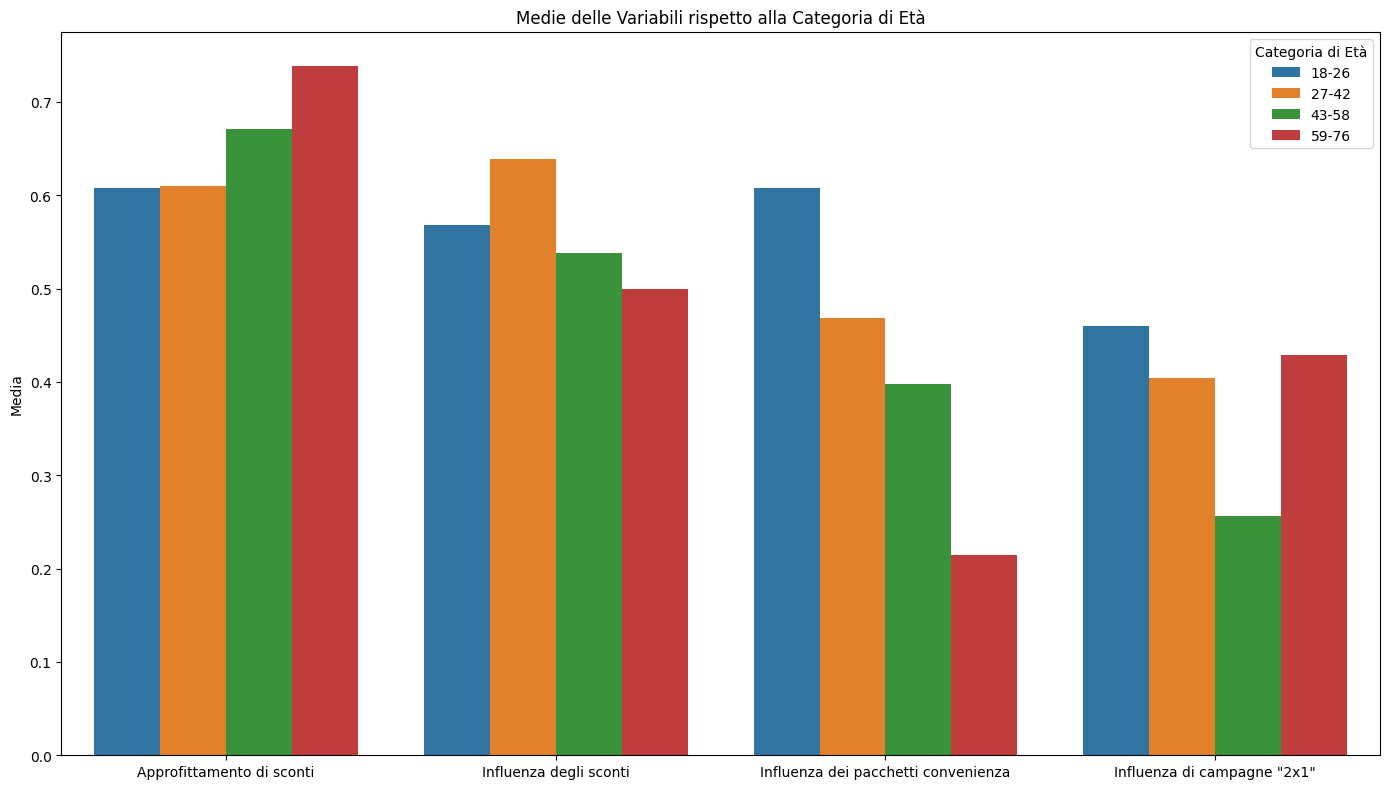

In [180]:
#df_ace_sconto è df_ace_price con le colonne 'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?','Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti]','Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? ["Pacchetti convenienza" con più prodotti a prezzo ridotto]','Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne "compri due paghi uno"]','Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Altro]',
columns_to_include = [
    'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?',
       'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti]',
       'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? ["Pacchetti convenienza" con più prodotti a prezzo ridotto]',
       'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne "compri due paghi uno"]',
       'Età:\xa0'
]
df_ace_sconto = df[columns_to_include]
       
df_ace_sconto.head()   
#see the distribution in the column 'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'
df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'].value_counts(normalize=True) * 100
# Sostituire tutti i valori 2.0 con 3.0 e viceversa nella colonna specificata
df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'] = df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'].replace({2.0: 3.0, 3.0: 2.0})


#see the distribution in the column 'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'
df_ace_sconto['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'].value_counts(normalize=True) * 100
df_ace_sconti = df_ace_sconto

df_ace_sconti['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?'] = df_ace_sconti['Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?']/3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumiamo che df_ace_sconti sia il tuo DataFrame con le colonne specificate
# df_ace_sconti = ...

# Mappatura fornita per l'età
mapping_eta = {
    "18-26": 0,
    "27-42": 1,
    "43-58": 2,
    "59-76": 3
}

# Invertire la mappatura
inverse_mapping_eta = {v: k for k, v in mapping_eta.items()}

# Applicare la mappatura invertita per l'età nel DataFrame
df_ace_sconti['Età:\xa0'] = df_ace_sconti['Età:\xa0'].map(inverse_mapping_eta)

# Calcolare la media per ciascuna categoria di età e per ciascuna variabile
medie_per_eta = df_ace_sconti.groupby('Età:\xa0').mean()

# Preparare i dati per il grafico a barre
medie_per_eta_melted = medie_per_eta.reset_index().melt(id_vars='Età:\xa0', var_name='Variabile', value_name='Media')


nuovi_label = {
    'Sei solito/a approfittare di offerte o promozioni sui prodotti Ace Spray?': 'Approfittamento di sconti',
    'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Sconti]': 'Influenza degli sconti',
    'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? ["Pacchetti convenienza" con più prodotti a prezzo ridotto]': 'Influenza dei pacchetti convenienza',
    'Quali tipi di promozioni o sconti influenzerebbero positivamente la decisione di acquisto? [Campagne "compri due paghi uno"]': 'Influenza di campagne "2x1"',
}

# Applicare i nuovi label al DataFrame
medie_per_eta_melted['Variabile'] = medie_per_eta_melted['Variabile'].replace(nuovi_label)

# Creare il grafico a barre con i nuovi label
plt.figure(figsize=(14, 8))
sns.barplot(x='Variabile', y='Media', hue='Età:\xa0', data=medie_per_eta_melted)

plt.title('Medie delle Variabili rispetto alla Categoria di Età')
plt.xlabel('')
plt.ylabel('Media')
plt.legend(title='Categoria di Età')


# Aggiungere una legenda aggiuntiva sotto il grafico
plt.xticks(rotation=0)
plt.subplots_adjust(bottom=0.)

plt.tight_layout()
plt.show()


    #ANALISI DEL MERCATO

In [196]:
#df_market is df with this column 'Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?','Ogni quanto tempo riacquisti solitamente lo spray?', 'In genere che formato preferisci?'
df_market = df[['Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?','Ogni quanto tempo riacquisti solitamente lo spray?', 'In genere che formato preferisci?', 'Età:\xa0']]

# Mappature per trasformare i valori
mappatura_riacquisto = {0: 90, 1: 60, 2: 30, 3: 15}
mappatura_formato = {0: 800, 1: 500}

# Applicare le mappature
df_market['Ogni quanto tempo riacquisti solitamente lo spray?'] = df_market['Ogni quanto tempo riacquisti solitamente lo spray?'].map(mappatura_riacquisto)
df_market['In genere che formato preferisci?'] = df_market['In genere che formato preferisci?'].map(mappatura_formato)

# Creare la variabile 'Prodotto al giorno'
df_market['Prodotto al giorno'] = df_market['In genere che formato preferisci?'] / df_market['Ogni quanto tempo riacquisti solitamente lo spray?']

df_market.head()
#media di 'Prodotto al giorno' diviso media di 'In genere che formato preferisci?'
avg_conf_day = df_market['Prodotto al giorno'].mean() / df_market['In genere che formato preferisci?'].mean()
avg_conf_year = avg_conf_day*365
avg_prod_year = df_market['Prodotto al giorno'].mean()*365
print(f"La media di prodotto consumato all'anno è {avg_prod_year:.2f} mL e la media di confezioni consumate annuo è {avg_conf_year:.2f}")
pop = 25700000
avg_prod_year_glob = avg_prod_year*pop
avg_conf_year_glob = avg_conf_year*pop

print(f"La media di prodotto consumato all'anno in Italia è {avg_prod_year_glob/1000:.2f} L e la media di confezioni consumate annuo in Italia è {avg_conf_year_glob:.2f}, di dimensione media pari a {df_market['In genere che formato preferisci?'].mean():.2f} mL")

La media di prodotto consumato all'anno è 7681.45 mL e la media di confezioni consumate annuo è 11.39
La media di prodotto consumato all'anno in Italia è 197413242.04 L e la media di confezioni consumate annuo in Italia è 292716186.47, di dimensione media pari a 674.42 mL


/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/469464174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_market['Ogni quanto tempo riacquisti solitamente lo spray?'] = df_market['Ogni quanto tempo riacquisti solitamente lo spray?'].map(mappatura_riacquisto)
/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_12775/469464174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_market['In genere che formato preferisci?'] = df_market['In genere che formato preferisci?'].map(m

In [90]:
import pandas as pd

# Supponiamo che df sia il tuo DataFrame originale
# df_market è df con queste colonne: 'Quante volte a settimana utilizzi gli spray...', ecc.

# Creare il DataFrame df_market
df_market = df[['Quante volte a settimana utilizzi gli spray per le pulizie più approfondite?', 'Ogni quanto tempo riacquisti solitamente lo spray?', 'In genere che formato preferisci?', 'Età:\xa0']]

# Mappature per trasformare i valori
mappatura_riacquisto = {0: 90, 1: 60, 2: 30, 3: 15}
mappatura_formato = {0: 800, 1: 500}

# Applicare le mappature
df_market['Ogni quanto tempo riacquisti solitamente lo spray?'] = df_market['Ogni quanto tempo riacquisti solitamente lo spray?'].map(mappatura_riacquisto)
df_market['In genere che formato preferisci?'] = df_market['In genere che formato preferisci?'].map(mappatura_formato)

# Creare la variabile 'Prodotto al giorno'
df_market['Prodotto al giorno'] = df_market['In genere che formato preferisci?'] / df_market['Ogni quanto tempo riacquisti solitamente lo spray?']

# Mappatura per le categorie d'età
categorie_eta = {0: 'Categoria_1', 1: 'Categoria_2', 2: 'Categoria_3', 3: 'Categoria_4'}
df_market['Categoria Età'] = df_market['Età:\xa0'].map(categorie_eta)

# Calcolare la media di 'Prodotto al giorno' e di confezioni per categoria d'età
media_prodotto_per_categoria = df_market.groupby('Categoria Età')['Prodotto al giorno'].mean()
media_confezioni_per_categoria = df_market.groupby('Categoria Età')['In genere che formato preferisci?'].mean() / df_market.groupby('Categoria Età')['Ogni quanto tempo riacquisti solitamente lo spray?'].mean()

# Stampa risultati
for categoria in categorie_eta.values():
    print(f"Media di prodotto consumato al giorno per {categoria}: {media_prodotto_per_categoria[categoria]:.2f} mL")
    print(f"Media di confezioni consumate al giorno per {categoria}: {media_confezioni_per_categoria[categoria]:.2f}")


# Popolazioni per ciascuna categoria d'età
popolazioni = {'Categoria_1': 5277000, 'Categoria_2': 10549000, 'Categoria_3': 14717000, 'Categoria_4': 13254000}

# Calcolo della media ponderata per il prodotto al giorno
media_ponderata_prodotto = sum(media_prodotto_per_categoria[categoria] * popolazioni[categoria] for categoria in categorie_eta.values()) / sum(popolazioni.values())

# Calcolo della media ponderata per le confezioni al giorno
media_ponderata_confezioni = sum(media_confezioni_per_categoria[categoria] * popolazioni[categoria] for categoria in categorie_eta.values()) / sum(popolazioni.values())

# Stampa delle medie ponderate
print(f"Media ponderata di prodotto consumato al giorno: {media_ponderata_prodotto:.2f} mL")
print(f"Media ponderata di confezioni consumate al giorno: {media_ponderata_confezioni:.2f}")


Media di prodotto consumato al giorno per Categoria_1: 18.75 mL
Media di confezioni consumate al giorno per Categoria_1: 14.56
Media di prodotto consumato al giorno per Categoria_2: 21.01 mL
Media di confezioni consumate al giorno per Categoria_2: 15.94
Media di prodotto consumato al giorno per Categoria_3: 23.38 mL
Media di confezioni consumate al giorno per Categoria_3: 17.43
Media di prodotto consumato al giorno per Categoria_4: 18.52 mL
Media di confezioni consumate al giorno per Categoria_4: 14.32
Media ponderata di prodotto consumato al giorno: 20.78 mL
Media ponderata di confezioni consumate al giorno: 15.78


/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_1509/4068580821.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_market['Ogni quanto tempo riacquisti solitamente lo spray?'] = df_market['Ogni quanto tempo riacquisti solitamente lo spray?'].map(mappatura_riacquisto)
/var/folders/hj/5lts6hgx6157sgct8z66ztcw0000gn/T/ipykernel_1509/4068580821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_market['In genere che formato preferisci?'] = df_market['In genere che formato preferisci?'].map(

    CHIMICITÀ DEL PRODOTTO

In [203]:
#df_chim is the dataset df with only the columns 'Utilizzi i guanti durante le pulizie?\xa0', 'Utilizzi la candeggina quando fai le pulizie?', 'Se sì, in che formato?\xa0', 'Per cosa la utilizzi? [Bagno]', 'Per cosa la utilizzi? [Bucato ]', 'Per cosa la utilizzi? [Igienizzare superfici ]', 'Per cosa la utilizzi? [Altro]', 'Se no, perchè non la utilizzi [paura di rovinare superficie/tessuto]', 'Se no, perchè non la utilizzi [non so come usarla bene ]', 'Se no, perchè non la utilizzi [non la ritengo necessaria ]', "Se no, perchè non la utilizzi [non mi piace l'odore ]", 'Se no, perchè non la utilizzi [Altro]', 'Ritieni che i prodotti spray siano troppo aggressivi sulla pelle?\xa0', "Se sì, hai mai avuto esperienze negative (irritazione/fastidio dato dall'inalazione)", 'Con quale prodotto?\xa0 [Ace]', 'Con quale prodotto?\xa0 [Cif]', 'Con quale prodotto?\xa0 [Chanteclair]', 'Con quale prodotto?\xa0 [Smac]', 'Con quale prodotto?\xa0 [Viakal]', 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Aggressività prodotto sulla pelle ]' 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ]', 'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ]' 'Valuta le seguenti carettiristiche di Chanteclair su una scala da 1 a 5 [Aggressività del prodotto]'
columns_to_include = [
    'Quale marchio acquisti solitamente?',
    'Utilizzi i guanti durante le pulizie?\xa0',
    'Utilizzi la candeggina quando fai le pulizie?',
    'Se sì, in che formato?\xa0',
    'Per cosa la utilizzi? [Bagno]',
    'Per cosa la utilizzi? [Bucato ]',
    'Per cosa la utilizzi? [Igienizzare superfici ]',
    'Se no, perchè non la utilizzi [paura di rovinare superficie/tessuto]',
    'Se no, perchè non la utilizzi [non so come usarla bene ]',
    'Se no, perchè non la utilizzi [non la ritengo necessaria ]',
    "Se no, perchè non la utilizzi [non mi piace l'odore ]",
    'Ritieni che i prodotti spray siano troppo aggressivi sulla pelle?\xa0',
    "Se sì, hai mai avuto esperienze negative (irritazione/fastidio dato dall'inalazione)",
    'Con quale prodotto?\xa0 [Ace]',
    'Con quale prodotto?\xa0 [Cif]',
    'Con quale prodotto?\xa0 [Chanteclair]',
    'Con quale prodotto?\xa0 [Smac]',
    'Con quale prodotto?\xa0 [Viakal]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ]',
    'Valuta le seguenti carettiristiche di Chanteclair su una scala da 1 a 5 [Aggressività del prodotto]'
]
df_chim = df[columns_to_include]

In [210]:
#get the distribution of the columns ''Con quale prodotto?\xa0 [Ace]', 'Con quale prodotto?\xa0 [Cif]', 'Con quale prodotto?\xa0 [Chanteclair]', 'Con quale prodotto?\xa0 [Smac]', 'Con quale prodotto?\xa0 [Viakal]','
df_chim_ace = df_chim['Con quale prodotto?\xa0 [Ace]'].value_counts(normalize=False) * 100/len(df_chim['Quale marchio acquisti solitamente?'] == 0)
df_chim_cif = df_chim['Con quale prodotto?\xa0 [Cif]'].value_counts(normalize=False) * 100/len(df_chim['Quale marchio acquisti solitamente?'] == 3)
df_chim_chant = df_chim['Con quale prodotto?\xa0 [Chanteclair]'].value_counts(normalize=False) * 100/len(df_chim['Quale marchio acquisti solitamente?'] == 2)
df_chim_smac = df_chim['Con quale prodotto?\xa0 [Smac]'].value_counts(normalize=False) * 100/len(df_chim['Quale marchio acquisti solitamente?'] == 4)
df_chim_viakal = df_chim['Con quale prodotto?\xa0 [Viakal]'].value_counts(normalize=False) * 100/len(df_chim['Quale marchio acquisti solitamente?'] == 5)

#print all these values
print(df_chim_ace)
print(df_chim_cif)
print(df_chim_chant)
print(df_chim_smac)
print(df_chim_viakal)

#make a table with these values
df_chim_marchi = pd.DataFrame(df_chim_ace)
df_chim_marchi['Cif'] = df_chim_cif
df_chim_marchi['Chanteclair'] = df_chim_chant
df_chim_marchi['Smac'] = df_chim_smac
df_chim_marchi['Viakal'] = df_chim_viakal
df_chim_marchi.columns = ['Ace', 'Cif', 'Chanteclair', 'Smac', 'Viakal']
df_chim_marchi = df_chim_marchi.T
df_chim_marchi

Con quale prodotto?  [Ace]
0.0    10.4
1.0     6.6
Name: count, dtype: float64
Con quale prodotto?  [Cif]
0.0    15.6
1.0     1.4
Name: count, dtype: float64
Con quale prodotto?  [Chanteclair]
0.0    14.8
1.0     2.2
Name: count, dtype: float64
Con quale prodotto?  [Smac]
0.0    16.0
1.0     1.0
Name: count, dtype: float64
Con quale prodotto?  [Viakal]
0.0    12.6
1.0     4.4
Name: count, dtype: float64


Con quale prodotto? [Ace],0.0,1.0
Ace,10.4,6.6
Cif,15.6,1.4
Chanteclair,14.8,2.2
Smac,16.0,1.0
Viakal,12.6,4.4


        Siccome c'è attenzione ad Ace vediamo meglio

In [237]:
#aggrega il df rispetto alla colonna 'Quale marchio acquisti solitamente?'
df_chim_marchi_agg = df_chim.groupby('Quale marchio acquisti solitamente?')

df_chim_marchi_agg.head()

,Quale marchio acquisti solitamente?,Utilizzi i guanti durante le pulizie?,Utilizzi la candeggina quando fai le pulizie?,"Se sì, in che formato?",Per cosa la utilizzi? [Bagno],Per cosa la utilizzi? [Bucato ],Per cosa la utilizzi? [Igienizzare superfici ],Per cosa la utilizzi? [Altro],"Se no, perchè non la utilizzi [paura di rovinare superficie/tessuto]","Se no, perchè non la utilizzi [non so come usarla bene ]",...,Con quale prodotto? [Viakal],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ],Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ],Valuta le seguenti carettiristiche di Chanteclair su una scala da 1 a 5 [Aggressività del prodotto]
0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
7,0.0,2.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN
8,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,5.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
14,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,4.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
#fammi vedree la distribuzione di 'Utilizzi i guanti durante le pulizie?\xa0', 'Utilizzi la candeggina quando fai le pulizie?', rispetto alla colonna 'Quale marchio acquisti solitamente?'
df_chim_marchi_agg['Utilizzi i guanti durante le pulizie?\xa0'].value_counts(normalize=True) * 100

Quale marchio acquisti solitamente?  Utilizzi i guanti durante le pulizie? 
0.0                                  1.0                                       45.783133
                                     0.0                                       40.963855
                                     2.0                                       13.253012
1.0                                  0.0                                       39.285714
                                     1.0                                       35.714286
                                     2.0                                       25.000000
2.0                                  1.0                                       48.170732
                                     0.0                                       40.853659
                                     2.0                                       10.975610
3.0                                  0.0                                       51.282051
                                  

In [239]:
df_chim_marchi_agg['Utilizzi la candeggina quando fai le pulizie?'].value_counts(normalize=True) * 100

Quale marchio acquisti solitamente?  Utilizzi la candeggina quando fai le pulizie?
0.0                                  1.0                                              74.698795
                                     0.0                                              25.301205
1.0                                  1.0                                              64.285714
                                     0.0                                              35.714286
2.0                                  1.0                                              71.341463
                                     0.0                                              28.658537
3.0                                  1.0                                              79.487179
                                     0.0                                              20.512821
4.0                                  1.0                                              75.000000
                                     0.0             

In [240]:
df_chim_marchi_agg['Ritieni che i prodotti spray siano troppo aggressivi sulla pelle?\xa0'].value_counts(normalize=True) * 100

Quale marchio acquisti solitamente?  Ritieni che i prodotti spray siano troppo aggressivi sulla pelle? 
0.0                                  1.0                                                                   50.649351
                                     0.0                                                                   49.350649
1.0                                  0.0                                                                   54.716981
                                     1.0                                                                   45.283019
2.0                                  0.0                                                                   67.096774
                                     1.0                                                                   32.903226
3.0                                  0.0                                                                   54.285714
                                     1.0                                     

In [244]:
import matplotlib.pyplot as plt
import pandas as pd

# Assumiamo che df_chim_marchi_agg sia il risultato dell'aggregazione di df_chim
# df_chim_marchi_agg = ...

# Calcolare le distribuzioni per ciascuna delle tre variabili e convertirle in DataFrame
distrib_guanti = df_chim_marchi_agg['Utilizzi i guanti durante le pulizie?\xa0'].value_counts(normalize=True).unstack() * 100
distrib_candeggina = df_chim_marchi_agg['Utilizzi la candeggina quando fai le pulizie?'].value_counts(normalize=True).unstack() * 100
distrib_aggressivi = df_chim_marchi_agg['Ritieni che i prodotti spray siano troppo aggressivi sulla pelle?\xa0'].value_counts(normalize=True).unstack() * 100

# Invertire la mappatura dei marchi
inverse_mappatura_marchi = {
    0: "Ace",
    1: "Altro",
    2: "Chanteclair",
    3: "Cif",
    4: "Smac",
    5: "Viakal"
}

# Aggiornare i label delle colonne
label_guanti = {0: 'Non uso i guanti', 1: 'Uso i guanti solo per pulizie approfondite', 2: 'Uso sempre i guanti'}
label_candeggina = {0: 'Non uso la candeggina', 1: 'Uso la candeggina'}
label_aggressivi = {0: 'I prodotti non sono troppo aggressivi', 1: 'I prodotti sono troppo aggressivi'}

# Funzione per creare una tabella e salvarla come immagine senza titolo
def crea_tabella_e_salva(distribuzione, file_salvataggio, label_colonne):
    distribuzione = distribuzione.rename(index=inverse_mappatura_marchi, columns=label_colonne)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    tabella = ax.table(cellText=distribuzione.values, rowLabels=distribuzione.index, colLabels=distribuzione.columns, loc='center', cellLoc='center')
    tabella.auto_set_font_size(False)
    tabella.set_fontsize(10)
    tabella.scale(1, 4)  # Modificare la scala per adattare le dimensioni delle celle
    plt.savefig(file_salvataggio, bbox_inches='tight')
    plt.close()
    return file_salvataggio

# Creare e salvare le tabelle come immagini
file_guanti = crea_tabella_e_salva(distrib_guanti, '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_guanti.png', label_guanti)
file_candeggina = crea_tabella_e_salva(distrib_candeggina, '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_candeggina.png', label_candeggina)
file_aggressivi = crea_tabella_e_salva(distrib_aggressivi, '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_aggressivi.png', label_aggressivi)

# Stampa i percorsi dei file salvati
print(file_guanti, file_candeggina, file_aggressivi)


/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_guanti.png /Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_candeggina.png /Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività/distrib_aggressivi.png


In [225]:
# Calcolare la media dei valori nelle colonne specificate
media_aggressivita = df_chim[[
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Universale\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Cucina\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Sgrassatore Igienizzante con candeggina [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno Brillante\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Bagno con candeggina\xa0 [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +mousse [Aggressività prodotto sulla pelle ]',
    'Valuta le caratteristiche del seguente prodotto: Ace Candeggina Più Spray +oxygen [Aggressività prodotto sulla pelle ]'
]].mean()

#make it a dataframe
df_media_aggressivita = pd.DataFrame(media_aggressivita)
df_media_aggressivita.columns = ['Media aggressività percepita prodotti']
#Riomina le righe con il nome del prodotto
df_media_aggressivita.index = [
    'Ace Sgrassatore Universale',
    'Ace Sgrassatore Cucina',
    'Ace Sgrassatore Igienizzante',
    'Ace Sgrassatore Igienizzante con candeggina',
    'Ace Bagno Brillante',
    'Ace Bagno con candeggina',
    'Ace Candeggina Più Spray +mousse',
    'Ace Candeggina Più Spray +oxygen'
]
df_media_aggressivita

,Media aggressività percepita prodotti
Ace Sgrassatore Universale,2.865385
Ace Sgrassatore Cucina,2.867647
Ace Sgrassatore Igienizzante,2.938462
Ace Sgrassatore Igienizzante con candeggina,3.263158
Ace Bagno Brillante,3.000000
Ace Bagno con candeggina,3.517241
Ace Candeggina Più Spray +mousse,3.372549
Ace Candeggina Più Spray +oxygen,3.384615


In [226]:
import matplotlib.pyplot as plt

# Aggiustare il layout della tabella per centrarla e ridimensionare le colonne
fig, ax = plt.subplots(figsize=(10, 4))  # Aumentare le dimensioni per un migliore adattamento
ax.axis('off')  # Nascondere gli assi

# Creare la tabella con dimensioni delle celle adattate
table = ax.table(cellText=df_media_aggressivita.values, rowLabels=df_media_aggressivita.index, colLabels=df_media_aggressivita.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 4)  # Modificare la scala per adattare le dimensioni delle celle

# Salvare la tabella come immagine
plt.savefig('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/Aggressività', bbox_inches='tight')
plt.close()

In [2]:
import pandas as pd
df = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/dataset_convertito.csv')

In [3]:
list(df.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [4]:
#see the distribution of the column  'E Ace Spray?'
df['E Ace Spray?'].value_counts(normalize=True) * 100

E Ace Spray?
1.0    79.441624
0.0    20.558376
Name: proportion, dtype: float64